In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import shap

In [2]:
def roccurve(task):
    basefile='G:/AKIprediction/non_SMOTE_result/'
    roc_curve_lr=pd.read_csv(basefile+task+'_result/roc_curve'+task+'_lr.csv',encoding='gbk')
    roc_curve_svm=pd.read_csv(basefile+task+'_result/roc_curve'+task+'_svm.csv',encoding='gbk')
    roc_curve_lstm=pd.read_csv(basefile+task+'_result/roc_curve'+task+'_lstm.csv',encoding='gbk')
    roc_curve_gru=pd.read_csv(basefile+task+'_result/roc_curve'+task+'_gru.csv',encoding='gbk')
    roc_curve_dipole=pd.read_csv(basefile+task+'_result/roc_curve'+task+'_Dipole.csv',encoding='gbk')
    roc_curve_retain=pd.read_csv(basefile+task+'_result/roc_curve'+task+'_retain.csv',encoding='gbk')
    roc_curve_ourmodel=pd.read_csv(basefile+task+'_result/roc_curve'+task+'_ourmodel.csv',encoding='gbk')
    fig, ax = plt.subplots(figsize = (17, 17))
    plt.grid(color='#CFCFCF',lw=3)
    plt.plot([0, 1], [0, 1], linestyle="--", lw=3, color="#CFCFCF")
    plt.plot(roc_curve_lr['mean_fpr'], roc_curve_lr['mean_tpr'], label='LR', color='#C76DA2',linewidth=6.5)
    plt.plot(roc_curve_svm['mean_fpr'], roc_curve_svm['mean_tpr'], label='SVM', color='#05B9E2',linewidth=6.5)
    plt.plot(roc_curve_lstm['mean_fpr'], roc_curve_lstm['mean_tpr'], label='LSTM', color='#F27970',linewidth=6.5)
    plt.plot(roc_curve_gru['mean_fpr'], roc_curve_gru['mean_tpr'], label='GRU', color='#BB9727',linewidth=6.5)
    plt.plot(roc_curve_dipole['mean_fpr'], roc_curve_dipole['mean_tpr'], label='Dipole', color='#54B345',linewidth=6.5)
    plt.plot(roc_curve_retain['mean_fpr'], roc_curve_retain['mean_tpr'], label='RETAIN', color='#8983BF',linewidth=6.5)
    plt.plot(roc_curve_ourmodel['mean_fpr'], roc_curve_ourmodel['mean_tpr'], label='Our model', color='#496C88',linewidth=6.5)
    plt.fill_between(roc_curve_lr['mean_fpr'],roc_curve_lr['tprs_lower'],roc_curve_lr['tprs_upper'],color="#C76DA2",alpha=0.2)
    plt.fill_between(roc_curve_svm['mean_fpr'],roc_curve_svm['tprs_lower'],roc_curve_svm['tprs_upper'],color='#05B9E2',alpha=0.2)
    plt.fill_between(roc_curve_lstm['mean_fpr'],roc_curve_lstm['tprs_lower'],roc_curve_lstm['tprs_upper'],color="#F27970",alpha=0.2)
    plt.fill_between(roc_curve_gru['mean_fpr'],roc_curve_gru['tprs_lower'],roc_curve_gru['tprs_upper'],color='#BB9727',alpha=0.2)
    plt.fill_between(roc_curve_dipole['mean_fpr'],roc_curve_dipole['tprs_lower'],roc_curve_dipole['tprs_upper'],color="#54B345",alpha=0.2)
    plt.fill_between(roc_curve_retain['mean_fpr'],roc_curve_retain['tprs_lower'],roc_curve_retain['tprs_upper'],color='#8983BF',alpha=0.2)
    plt.fill_between(roc_curve_ourmodel['mean_fpr'],roc_curve_ourmodel['tprs_lower'],roc_curve_ourmodel['tprs_upper'],color='#496C88',alpha=0.2)
    font2 = {'family' : 'Arial',
    'weight' : 'normal',
    'size'   : 48,
    }
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(True)    
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(True)    
    ax.get_xaxis().tick_bottom()    
    ax.get_yaxis().tick_left()
    ax.spines['bottom'].set_linewidth(3)
    ax.spines['left'].set_linewidth(3)
    ax.axis([0,1.01,0,1.01])
    plt.yticks(np.arange(0, 1.2, 0.2))
    plt.xticks(np.arange(0, 1.2, 0.2))
    plt.tick_params(labelsize=50)
    plt.tick_params(which='major',width=3,length=15)
    labels = ax.get_xticklabels() + ax.get_yticklabels()
    [label.set_fontname('Arial') for label in labels]
    plt.xlabel('False Positive Rate',font2)
    plt.ylabel('True Positive Rate',font2)
    plt.legend(loc="lower right",prop={'size':40,'family' : 'Arial','weight' : 'normal'})
    plt.savefig(basefile+task+'_result/ROC_curve.tiff',bbox_inches = 'tight',dpi=300)

In [3]:
def prcurve(task):
    basefile='G:/AKIprediction/non_SMOTE_result/'
    pr_curve_lr=pd.read_csv(basefile+task+'_result/pr_curve'+task+'_lr.csv',encoding='gbk')
    pr_curve_svm=pd.read_csv(basefile+task+'_result/pr_curve'+task+'_svm.csv',encoding='gbk')
    pr_curve_lstm=pd.read_csv(basefile+task+'_result/pr_curve'+task+'_lstm.csv',encoding='gbk')
    pr_curve_gru=pd.read_csv(basefile+task+'_result/pr_curve'+task+'_gru.csv',encoding='gbk')
    pr_curve_dipole=pd.read_csv(basefile+task+'_result/pr_curve'+task+'_Dipole.csv',encoding='gbk')
    pr_curve_retain=pd.read_csv(basefile+task+'_result/pr_curve'+task+'_retain.csv',encoding='gbk')
    pr_curve_ourmodel=pd.read_csv(basefile+task+'_result/pr_curve'+task+'_ourmodel.csv',encoding='gbk')
    fig, ax = plt.subplots(figsize = (17, 17))
    plt.grid(color='#CFCFCF',lw=3)
    plt.plot(pr_curve_lr['mean_recall'], pr_curve_lr['mean_precision'], label='LR', color='#C76DA2',linewidth=6.5)
    plt.plot(pr_curve_svm['mean_recall'], pr_curve_svm['mean_precision'], label='SVM', color='#05B9E2',linewidth=6.5)
    plt.plot(pr_curve_lstm['mean_recall'], pr_curve_lstm['mean_precision'], label='LSTM', color='#F27970',linewidth=6.5)
    plt.plot(pr_curve_gru['mean_recall'], pr_curve_gru['mean_precision'], label='GRU', color='#BB9727',linewidth=6.5)
    plt.plot(pr_curve_dipole['mean_recall'], pr_curve_dipole['mean_precision'], label='Dipole', color='#54B345',linewidth=6.5)
    plt.plot(pr_curve_retain['mean_recall'], pr_curve_retain['mean_precision'], label='RETAIN', color='#8983BF',linewidth=6.5)
    plt.plot(pr_curve_ourmodel['mean_recall'], pr_curve_ourmodel['mean_precision'], label='Our model', color='#496C88',linewidth=6.5)
    plt.fill_between(pr_curve_lr['mean_recall'],pr_curve_lr['precision_lower'],pr_curve_lr['precision_upper'],color="#C76DA2",alpha=0.2)
    plt.fill_between(pr_curve_svm['mean_recall'],pr_curve_svm['precision_lower'],pr_curve_svm['precision_upper'],color='#05B9E2',alpha=0.2)
    plt.fill_between(pr_curve_lstm['mean_recall'],pr_curve_lstm['precision_lower'],pr_curve_lstm['precision_upper'],color="#F27970",alpha=0.2)
    plt.fill_between(pr_curve_gru['mean_recall'],pr_curve_gru['precision_lower'],pr_curve_gru['precision_upper'],color='#BB9727',alpha=0.2)
    plt.fill_between(pr_curve_dipole['mean_recall'],pr_curve_dipole['precision_lower'],pr_curve_dipole['precision_upper'],color="#54B345",alpha=0.2)
    plt.fill_between(pr_curve_retain['mean_recall'],pr_curve_retain['precision_lower'],pr_curve_retain['precision_upper'],color='#8983BF',alpha=0.2)
    plt.fill_between(pr_curve_ourmodel['mean_recall'],pr_curve_ourmodel['precision_lower'],pr_curve_ourmodel['precision_upper'],color='#496C88',alpha=0.2)
    font2 = {'family' : 'Arial',
    'weight' : 'normal',
    'size'   : 48,
    }
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(True)    
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(True)    
    ax.get_xaxis().tick_bottom()    
    ax.get_yaxis().tick_left()
    ax.spines['bottom'].set_linewidth(3)
    ax.spines['left'].set_linewidth(3)
    ax.axis([0,1.01,0,1.01])
    plt.yticks(np.arange(0, 1.2, 0.2))
    plt.xticks(np.arange(0, 1.2, 0.2))
    plt.tick_params(labelsize=50)
    plt.tick_params(which='major',width=3,length=15)
    labels = ax.get_xticklabels() + ax.get_yticklabels()
    [label.set_fontname('Arial') for label in labels]
    plt.xlabel('Recall',font2)
    plt.ylabel('Precision',font2)
    plt.legend(loc="upper right",prop={'size':40,'family' : 'Arial','weight' : 'normal'})
    plt.savefig(basefile+task+'_result/PR_curve.tiff',bbox_inches = 'tight',dpi=300)

In [240]:
def smote_roccurve(task):
    basefile='G:/AKIprediction/SMOTE_result/'
    roc_curve_lr=pd.read_csv(basefile+task+'_result/roc_curve'+task+'_lr.csv',encoding='gbk')
    roc_curve_svm=pd.read_csv(basefile+task+'_result/roc_curve'+task+'_svm.csv',encoding='gbk')
    roc_curve_lstm=pd.read_csv(basefile+task+'_result/roc_curve'+task+'_lstm.csv',encoding='gbk')
    roc_curve_gru=pd.read_csv(basefile+task+'_result/roc_curve'+task+'_gru.csv',encoding='gbk')
    roc_curve_dipole=pd.read_csv(basefile+task+'_result/roc_curve'+task+'_Dipole.csv',encoding='gbk')
    roc_curve_retain=pd.read_csv(basefile+task+'_result/roc_curve'+task+'_retain.csv',encoding='gbk')
    roc_curve_ourmodel=pd.read_csv(basefile+task+'_result/roc_curve'+task+'_ourmodel.csv',encoding='gbk')
    fig, ax = plt.subplots(figsize = (17, 17))
    plt.grid(color='#CFCFCF',lw=3)
    plt.plot([0, 1], [0, 1], linestyle="--", lw=3, color="#CFCFCF")
    plt.plot(roc_curve_lr['mean_fpr'], roc_curve_lr['mean_tpr'], label='LR', color='#C76DA2',linewidth=6.5)
    plt.plot(roc_curve_svm['mean_fpr'], roc_curve_svm['mean_tpr'], label='SVM', color='#05B9E2',linewidth=6.5)
    plt.plot(roc_curve_lstm['mean_fpr'], roc_curve_lstm['mean_tpr'], label='LSTM', color='#F27970',linewidth=6.5)
    plt.plot(roc_curve_gru['mean_fpr'], roc_curve_gru['mean_tpr'], label='GRU', color='#BB9727',linewidth=6.5)
    plt.plot(roc_curve_dipole['mean_fpr'], roc_curve_dipole['mean_tpr'], label='Dipole', color='#54B345',linewidth=6.5)
    plt.plot(roc_curve_retain['mean_fpr'], roc_curve_retain['mean_tpr'], label='RETAIN', color='#8983BF',linewidth=6.5)
    plt.plot(roc_curve_ourmodel['mean_fpr'], roc_curve_ourmodel['mean_tpr'], label='Our model', color='#496C88',linewidth=6.5)
    plt.fill_between(roc_curve_lr['mean_fpr'],roc_curve_lr['tprs_lower'],roc_curve_lr['tprs_upper'],color="#C76DA2",alpha=0.2)
    plt.fill_between(roc_curve_svm['mean_fpr'],roc_curve_svm['tprs_lower'],roc_curve_svm['tprs_upper'],color='#05B9E2',alpha=0.2)
    plt.fill_between(roc_curve_lstm['mean_fpr'],roc_curve_lstm['tprs_lower'],roc_curve_lstm['tprs_upper'],color="#F27970",alpha=0.2)
    plt.fill_between(roc_curve_gru['mean_fpr'],roc_curve_gru['tprs_lower'],roc_curve_gru['tprs_upper'],color='#BB9727',alpha=0.2)
    plt.fill_between(roc_curve_dipole['mean_fpr'],roc_curve_dipole['tprs_lower'],roc_curve_dipole['tprs_upper'],color="#54B345",alpha=0.2)
    plt.fill_between(roc_curve_retain['mean_fpr'],roc_curve_retain['tprs_lower'],roc_curve_retain['tprs_upper'],color='#8983BF',alpha=0.2)
    plt.fill_between(roc_curve_ourmodel['mean_fpr'],roc_curve_ourmodel['tprs_lower'],roc_curve_ourmodel['tprs_upper'],color='#496C88',alpha=0.2)
    font2 = {'family' : 'Arial',
    'weight' : 'normal',
    'size'   : 48,
    }
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(True)    
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(True)    
    ax.get_xaxis().tick_bottom()    
    ax.get_yaxis().tick_left()
    ax.spines['bottom'].set_linewidth(3)
    ax.spines['left'].set_linewidth(3)
    ax.axis([0,1.01,0,1.01])
    plt.yticks(np.arange(0, 1.2, 0.2))
    plt.xticks(np.arange(0, 1.2, 0.2))
    plt.tick_params(labelsize=50)
    plt.tick_params(which='major',width=3,length=15)
    labels = ax.get_xticklabels() + ax.get_yticklabels()
    [label.set_fontname('Arial') for label in labels]
    plt.xlabel('False Positive Rate',font2)
    plt.ylabel('True Positive Rate',font2)
    plt.legend(loc="lower right",prop={'size':40,'family' : 'Arial','weight' : 'normal'})
    plt.savefig(basefile+task+'_result/ROC_curve.tiff',bbox_inches = 'tight',dpi=300)
def smote_prcurve(task):
    basefile='G:/AKIprediction/SMOTE_result/'
    pr_curve_lr=pd.read_csv(basefile+task+'_result/pr_curve'+task+'_lr.csv',encoding='gbk')
    pr_curve_svm=pd.read_csv(basefile+task+'_result/pr_curve'+task+'_svm.csv',encoding='gbk')
    pr_curve_lstm=pd.read_csv(basefile+task+'_result/pr_curve'+task+'_lstm.csv',encoding='gbk')
    pr_curve_gru=pd.read_csv(basefile+task+'_result/pr_curve'+task+'_gru.csv',encoding='gbk')
    pr_curve_dipole=pd.read_csv(basefile+task+'_result/pr_curve'+task+'_Dipole.csv',encoding='gbk')
    pr_curve_retain=pd.read_csv(basefile+task+'_result/pr_curve'+task+'_retain.csv',encoding='gbk')
    pr_curve_ourmodel=pd.read_csv(basefile+task+'_result/pr_curve'+task+'_ourmodel.csv',encoding='gbk')
    fig, ax = plt.subplots(figsize = (17, 17))
    plt.grid(color='#CFCFCF',lw=3)
    plt.plot(pr_curve_lr['mean_recall'], pr_curve_lr['mean_precision'], label='LR', color='#C76DA2',linewidth=6.5)
    plt.plot(pr_curve_svm['mean_recall'], pr_curve_svm['mean_precision'], label='SVM', color='#05B9E2',linewidth=6.5)
    plt.plot(pr_curve_lstm['mean_recall'], pr_curve_lstm['mean_precision'], label='LSTM', color='#F27970',linewidth=6.5)
    plt.plot(pr_curve_gru['mean_recall'], pr_curve_gru['mean_precision'], label='GRU', color='#BB9727',linewidth=6.5)
    plt.plot(pr_curve_dipole['mean_recall'], pr_curve_dipole['mean_precision'], label='Dipole', color='#54B345',linewidth=6.5)
    plt.plot(pr_curve_retain['mean_recall'], pr_curve_retain['mean_precision'], label='RETAIN', color='#8983BF',linewidth=6.5)
    plt.plot(pr_curve_ourmodel['mean_recall'], pr_curve_ourmodel['mean_precision'], label='Our model', color='#496C88',linewidth=6.5)
    plt.fill_between(pr_curve_lr['mean_recall'],pr_curve_lr['precision_lower'],pr_curve_lr['precision_upper'],color="#C76DA2",alpha=0.2)
    plt.fill_between(pr_curve_svm['mean_recall'],pr_curve_svm['precision_lower'],pr_curve_svm['precision_upper'],color='#05B9E2',alpha=0.2)
    plt.fill_between(pr_curve_lstm['mean_recall'],pr_curve_lstm['precision_lower'],pr_curve_lstm['precision_upper'],color="#F27970",alpha=0.2)
    plt.fill_between(pr_curve_gru['mean_recall'],pr_curve_gru['precision_lower'],pr_curve_gru['precision_upper'],color='#BB9727',alpha=0.2)
    plt.fill_between(pr_curve_dipole['mean_recall'],pr_curve_dipole['precision_lower'],pr_curve_dipole['precision_upper'],color="#54B345",alpha=0.2)
    plt.fill_between(pr_curve_retain['mean_recall'],pr_curve_retain['precision_lower'],pr_curve_retain['precision_upper'],color='#8983BF',alpha=0.2)
    plt.fill_between(pr_curve_ourmodel['mean_recall'],pr_curve_ourmodel['precision_lower'],pr_curve_ourmodel['precision_upper'],color='#496C88',alpha=0.2)
    font2 = {'family' : 'Arial',
    'weight' : 'normal',
    'size'   : 48,
    }
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(True)    
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(True)    
    ax.get_xaxis().tick_bottom()    
    ax.get_yaxis().tick_left()
    ax.spines['bottom'].set_linewidth(3)
    ax.spines['left'].set_linewidth(3)
    ax.axis([0,1.01,0,1.01])
    plt.yticks(np.arange(0, 1.2, 0.2))
    plt.xticks(np.arange(0, 1.2, 0.2))
    plt.tick_params(labelsize=50)
    plt.tick_params(which='major',width=3,length=15)
    labels = ax.get_xticklabels() + ax.get_yticklabels()
    [label.set_fontname('Arial') for label in labels]
    plt.xlabel('Recall',font2)
    plt.ylabel('Precision',font2)
    plt.legend(loc="lower right",prop={'size':40,'family' : 'Arial','weight' : 'normal'})
    plt.savefig(basefile+task+'_result/PR_curve.tiff',bbox_inches = 'tight',dpi=300)

In [310]:
def shapplot(task,modelname):
    basefile='G:/AKIprediction/SHAP_SMOTE_result/'
    shap_value=np.load(basefile+task+'_result/shap_value'+task+'_'+modelname+'.npy')
    shap_value_time=np.load(basefile+task+'_result/shap_value_time'+task+'_'+modelname+'.npy')
    a_test1=np.load(basefile+task+'_result/a_test1'+task+'_'+modelname+'.npy')
    a_test2=np.load(basefile+task+'_result/a_test1'+task+'_'+modelname+'.npy')
    shap_value=np.sum(shap_value,axis=1)
    shap_value_time=np.sum(shap_value_time,axis=1)
    a_test1=np.mean(a_test1,axis=1)
    a_test2=np.mean(a_test2,axis=1)
    shap_value[shap_value > 0.75] = 0.75
    shap_value[shap_value < -0.75] = -0.75
    feature=['Systolic blood pressure','Diastolic blood pressure','Central venous pressure','Body temperature','Heart rate',
             'Pulse','Respiration rate','Oxygen saturation','Chloride','Sodium','Potassium'
             ,'pH level','Pressure of carbon dioxide','Bicarbonate','Standard base excess','Hemoglobin1',
             'Pressure of oxygen','Hematocrit','Carboxyhemoglobin','Oxygen Saturation','Methemoglobin','Bicarbonate','Calcium',
            'Actual base excess','Lactate','Glucose','Anion gap','Red blood count','Hematocrit','Platelet count',
             'Hemoglobin','White blood count','Mean corpuscular volume','Mean hemoglobin concentration',
             'Mean corpuscular hemoglobin','Red blood distribution width','Eosinophils','Neutrophils',
            'Lymphocytes','Monocytes','Basophils','Platelet distribution width','Mean platelet volume',
             'Platelet distribution width','Absolute eosinophil count','Absolute basophils count','Absolute monocyte count',
             'Absolute lymphocyte count','Absolute neutrophil count','C-reactive protein',
            'Age', '性别', '既往先心病手术次数', 'Height', 'Weight', '术前右上肢血氧饱和度', '术后右上肢血氧饱和度',
       'Operation time', '手术状态', 'Cardiopulmonary bypass time', 'Aortic cross-clamp time', 
             'Mechanical ventilation time', 'pRBC transfusion',
        'FFP transfusion','Autologous blood transfusion', '术前危险因素', '非心脏畸形', 'RACHS-1', 'ABC score', 'STS mormality score',
       'STS morbidity score', '主要手术个数', 'Number of defects', '右心室病变.三尖瓣整形',
       '右心室病变.法乐氏四联症矫治术.心室切开.跨环补片', '大动脉转位.大动脉调转术', '左心室病变.二尖瓣整形术.',
       '肺静脉畸形.完全肺静脉异位引流修补', '胸动脉和静脉.PDA闭合.外科.', '间隔缺损.卵圆孔缝合术',
       '间隔缺损.室间隔缺损修补.直接缝合', '间隔缺损.室间隔缺损修补.补片', '间隔缺损.房间隔缺损修补.补片',
       '间隔缺损.房间隔缺损缝合术.无补片.', '间隔缺损.部分房室通道修补术', '右心室病变.法洛氏四联症', '胸动脉和静脉.主动脉缩窄',
       '胸动脉和静脉.动脉导管未闭', '间隔缺损.卵园孔未闭', '间隔缺损.室间隔缺损.1型.干下型.',
       '间隔缺损.室间隔缺损.2型.膜周部.膜旁.', '间隔缺损.房室间隔缺损.部分性.原发孔型房间隔缺损.', '间隔缺损.继发孔型房间隔缺损',
       'Preoperative LOS']
    a_test1=pd.DataFrame(a_test1,columns=feature)
    a_test1.drop('Hemoglobin1',axis=1,inplace=True)
    shap_value=np.delete(shap_value,15,axis=1)
    shap.summary_plot(shap_value, a_test1,show=False, max_display=18)
    fig = plt.gcf()
    fig.set_figheight(32)
    fig.set_figwidth(35)
    ax = plt.gca()
    font2 = {'family' : 'Arial',
    'weight' : 'bold',
    'size'   : 42,
    }
    ax.get_xaxis().tick_bottom()    
    ax.spines['bottom'].set_linewidth(3)
    ax.spines['bottom'].set_color('black')
    plt.xlabel('SHAP value',font2)
    plt.tick_params(labelsize=40,labelcolor='black')
    plt.tick_params(which='major',width=3,length=8)
    labels = ax.get_xticklabels() + ax.get_yticklabels()
    [label.set_fontname('Arial') for label in labels]
    [label.set_fontweight('bold') for label in labels]
    plt.colorbar(shrink=0.4)
    plt.savefig(basefile+task+'_result/shap_plot_fig4.tiff',bbox_inches = 'tight',dpi=300)

In [312]:
shap_value=np.load('G:/AKIprediction/SHAP_SMOTE_result/surgery24_result/shap_valuesurgery24_ourmodel.npy')
a_test1=np.load('G:/AKIprediction/SHAP_SMOTE_result/surgery24_result/a_test1surgery24_ourmodel.npy')
shap_value=np.sum(shap_value,axis=1)
a_test1=np.mean(a_test1,axis=1)
feature=['Systolic blood pressure','Diastolic blood pressure','Central venous pressure','Body temperature','Heart rate',
             'Pulse','Respiration rate','Oxygen saturation','Chloride','Sodium','Potassium'
             ,'pH level','Pressure of carbon dioxide','Bicarbonate','Standard base excess','Hemoglobin1',
             'Pressure of oxygen','Hematocrit','Carboxyhemoglobin','Oxygen Saturation','Methemoglobin','Bicarbonate','Calcium',
            'Actual base excess','Lactate','Glucose','Anion gap','Red blood count','Hematocrit','Platelet count',
             'Hemoglobin','White blood count','Mean corpuscular volume','Mean hemoglobin concentration',
             'Mean corpuscular hemoglobin','Red blood distribution width','Eosinophils','Neutrophils',
            'Lymphocytes','Monocytes','Basophils','Platelet distribution width','Mean platelet volume',
             'Platelet distribution width','Absolute eosinophil count','Absolute basophils count','Absolute monocyte count',
             'Absolute lymphocyte count','Absolute neutrophil count','C-reactive protein',
            'Age', '性别', '既往先心病手术次数', 'Height', 'Weight', '术前右上肢血氧饱和度', '术后右上肢血氧饱和度',
       'Operation time', '手术状态', 'Cardiopulmonary bypass time', 'Aortic cross-clamp time', 
             'Mechanical ventilation time', 'pRBC transfusion',
        'FFP transfusion','Autologous blood transfusion', '术前危险因素', '非心脏畸形', 'RACHS-1', 'ABC score', 'STS mormality score',
       'STS morbidity score', '主要手术个数', 'Number of defects', '右心室病变.三尖瓣整形',
       '右心室病变.法乐氏四联症矫治术.心室切开.跨环补片', '大动脉转位.大动脉调转术', '左心室病变.二尖瓣整形术.',
       '肺静脉畸形.完全肺静脉异位引流修补', '胸动脉和静脉.PDA闭合.外科.', '间隔缺损.卵圆孔缝合术',
       '间隔缺损.室间隔缺损修补.直接缝合', '间隔缺损.室间隔缺损修补.补片', '间隔缺损.房间隔缺损修补.补片',
       '间隔缺损.房间隔缺损缝合术.无补片.', '间隔缺损.部分房室通道修补术', '右心室病变.法洛氏四联症', '胸动脉和静脉.主动脉缩窄',
       '胸动脉和静脉.动脉导管未闭', '间隔缺损.卵园孔未闭', '间隔缺损.室间隔缺损.1型.干下型.',
       '间隔缺损.室间隔缺损.2型.膜周部.膜旁.', '间隔缺损.房室间隔缺损.部分性.原发孔型房间隔缺损.', '间隔缺损.继发孔型房间隔缺损',
       'Preoperative LOS']
a_test1=pd.DataFrame(a_test1,columns=feature)
shap_value=pd.DataFrame(shap_value,columns=feature)
shap_result=pd.concat([a_test1,shap_value],axis=1)
shap_result

Systolic blood pressure  Diastolic blood pressure  \
0                      92.585                    53.000   
1                      89.280                    64.670   
2                     106.810                    61.890   
3                      94.485                    43.085   
4                      93.430                    47.605   
...                       ...                       ...   
1468                   76.000                    47.000   
1469                   95.490                    54.405   
1470                   80.720                    44.825   
1471                   97.045                    48.240   
1472                   94.145                    44.500   

      Central venous pressure  Body temperature  Heart rate    Pulse  \
0                       9.055           35.5005     143.640  145.630   
1                       5.745           35.4280     116.065  116.530   
2                       8.290           36.3205     147.220  150.940   
3                       9.825           36.1000     118.850  119.140   
4                      10.610           29.6650     125.855  129.155   
...                       ...               ...         ...      ...   
1468                    8.000           35.4000     125.000  127.000   
1469                    4.575           36.3155     139.080  141.355   
1470                    7.065           36.5925     128.485  132.765   
1471                    7.165           36.4480     130.740  133.490   
1472                    6.390           36.4115     167.715   95.490   

      Respiration rate  Oxygen saturation    Chloride      Sodium  ...  \
0               17.650             97.140  109.902500  134.082500  ...   
1               32.400             99.975  110.980000  137.150000  ...   
2               30.045             98.875  107.507500  133.285000  ...   
3               22.100             99.685  109.881667  138.010000  ...   
4               35.305             77.050  104.980000  132.215000  ...   
...                ...                ...         ...         ...  ...   
1468            24.000             99.000  101.277500  140.847500  ...   
1469            28.585             92.285  110.087500  136.590000  ...   
1470            29.990             96.730  105.015000  141.930000  ...   
1471            29.605             76.785  106.016429  137.302857  ...   
1472            27.120             80.060  106.980000  142.020000  ...   

      间隔缺损.部分房室通道修补术  右心室病变.法洛氏四联症  胸动脉和静脉.主动脉缩窄  胸动脉和静脉.动脉导管未闭  间隔缺损.卵园孔未闭  \
0       2.708633e-10 -1.088571e-07 -8.008218e-05      -0.000343   -0.000431   
1       4.195832e-13 -2.042211e-06 -1.306270e-10      -0.000074   -0.000077   
2       8.765685e-08 -4.640806e-05 -1.085567e-03       0.003370   -0.002375   
3       4.242416e-08 -4.345393e-06 -7.740860e-05      -0.000452   -0.000661   
4       5.324670e-04 -4.172628e-04 -4.287771e-09      -0.000283   -0.000890   
...              ...           ...           ...            ...         ...   
1468    0.000000e+00 -6.123052e-04 -1.644475e-09      -0.000048    0.001289   
1469    1.845288e-05 -1.780083e-05 -7.783229e-10      -0.000361    0.001052   
1470    2.021569e-04 -2.015678e-06 -2.610806e-06      -0.000429    0.003342   
1471    3.513454e-07 -2.059729e-05 -4.880292e-08      -0.000041   -0.000068   
1472   -1.834365e-09 -2.231221e-04 -1.285176e-05      -0.000145   -0.000164   

      间隔缺损.室间隔缺损.1型.干下型.  间隔缺损.室间隔缺损.2型.膜周部.膜旁.  间隔缺损.房室间隔缺损.部分性.原发孔型房间隔缺损.  \
0              -0.001179               0.000369                2.500802e-10   
1               0.000032              -0.000074                2.154040e-13   
2               0.000098              -0.001346                8.093449e-08   
3               0.000221               0.000216                3.917068e-08   
4               0.000272               0.000908                4.709159e-04   
...                  ...                    ...                         ...   
1468            0.000070              -0.

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
You passed a edgecolor/edgecolors ('w') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.


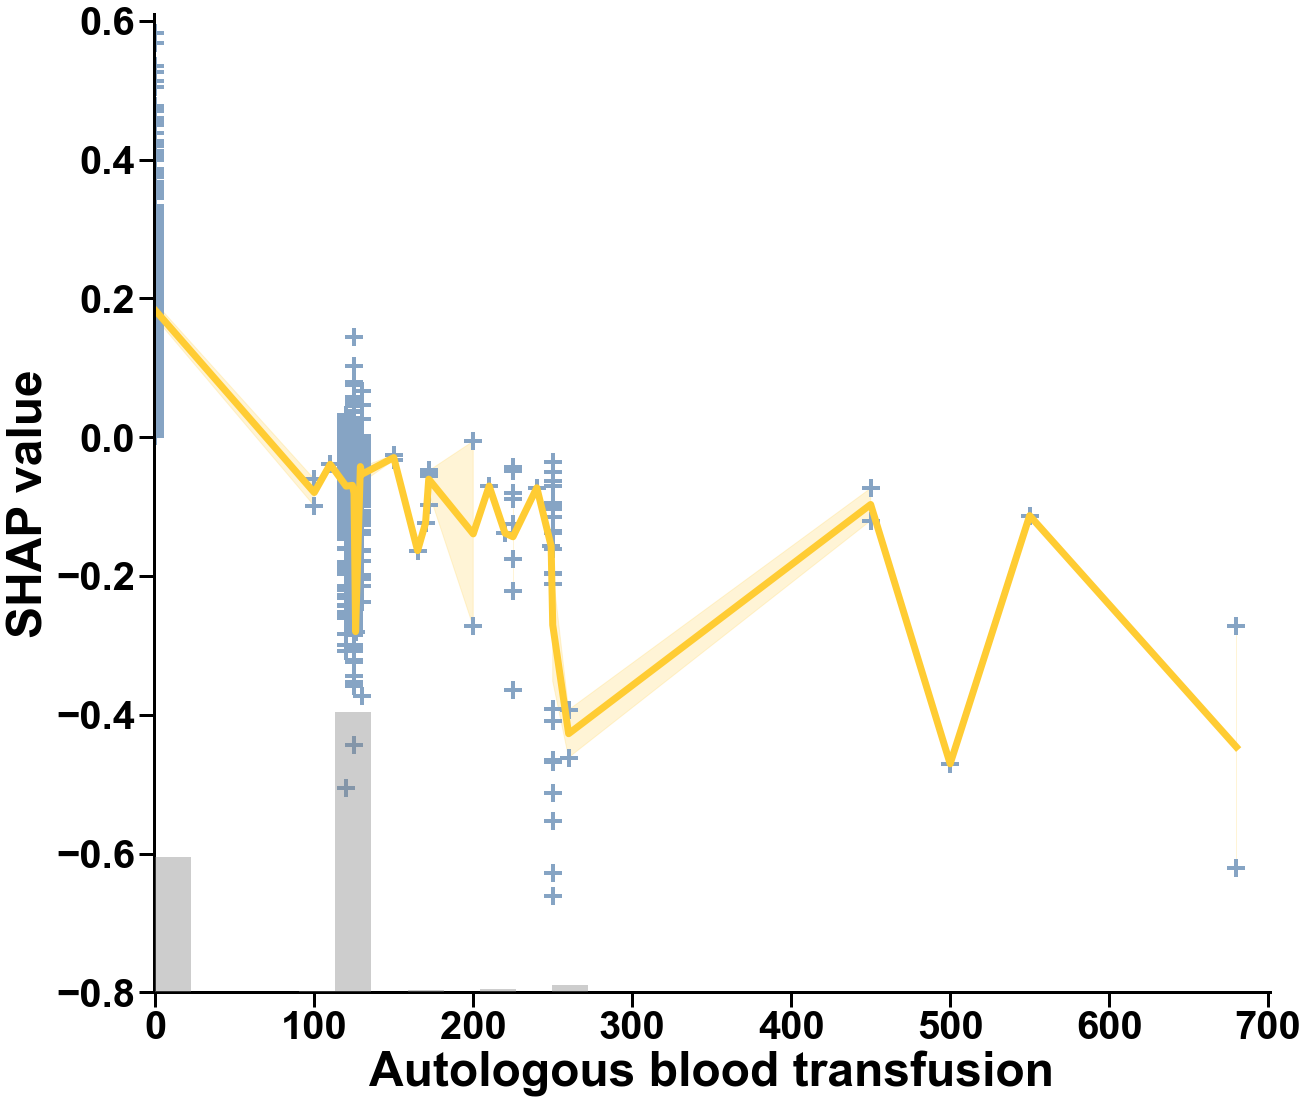

In [343]:
import seaborn as sns
fig,ax1 = plt.subplots(figsize=(20,18))
ax2 = ax1.twinx()
ax1.grid(False)
ax2.grid(False)
ax2.set_ylim(0,0.1)
ax2.spines["top"].set_visible(False)    
ax2.spines["bottom"].set_visible(False)    
ax2.spines["right"].set_visible(False)    
ax2.spines["left"].set_visible(False)
ax2.set_xticks([])
ax2.set_yticks([])
sns.distplot(abtranfusion['Autologous blood transfusion value'],30,kde=False,norm_hist=True,color='#828282',ax=ax2)
ax1.spines["top"].set_visible(False)    
ax1.spines["bottom"].set_visible(True)    
ax1.spines["right"].set_visible(False)    
ax1.spines["left"].set_visible(True)    
ax1.get_xaxis().tick_bottom()    
ax1.get_yaxis().tick_left()
ax1.set_xlim(-1,701)
ax1.set_ylim(-0.8,0.61)
my_x_ticks = np.arange(0, 701, 100)
my_y_ticks = np.arange(-0.8, 0.61, 0.2)
ax1.set_xticks(my_x_ticks)
ax1.set_yticks(my_y_ticks)
sns.lineplot(x="Autologous blood transfusion value", y="Autologous blood transfusion",data=abtranfusion,color='#FFCC33',lw=7,ax=ax1)
sns.scatterplot(data=abtranfusion, x="Autologous blood transfusion value", y="Autologous blood transfusion",s=360,marker="+",linewidth=4,ax=ax1,color='#86A4C4')
ax1.spines['bottom'].set_linewidth(3)
ax1.spines['left'].set_linewidth(3)
ax1.spines['bottom'].set_color('black')
ax1.spines['left'].set_color('black')
ax1.tick_params(labelsize=40)
ax1.tick_params(which='major',width=3,length=15)
labels = ax1.get_xticklabels() + ax1.get_yticklabels()
[label.set_fontname('Arial') for label in labels]
[label.set_fontweight('bold') for label in labels]
font2 = {'family' : 'Arial',
'weight' : 'bold',
'size'   : 48,
}
ax1.set_xlabel('Autologous blood transfusion',font2)
ax1.set_ylabel('SHAP value',font2)
plt.savefig('G:/AKIprediction/Maintext/abtransfusion.tiff',bbox_inches = 'tight',dpi=300)

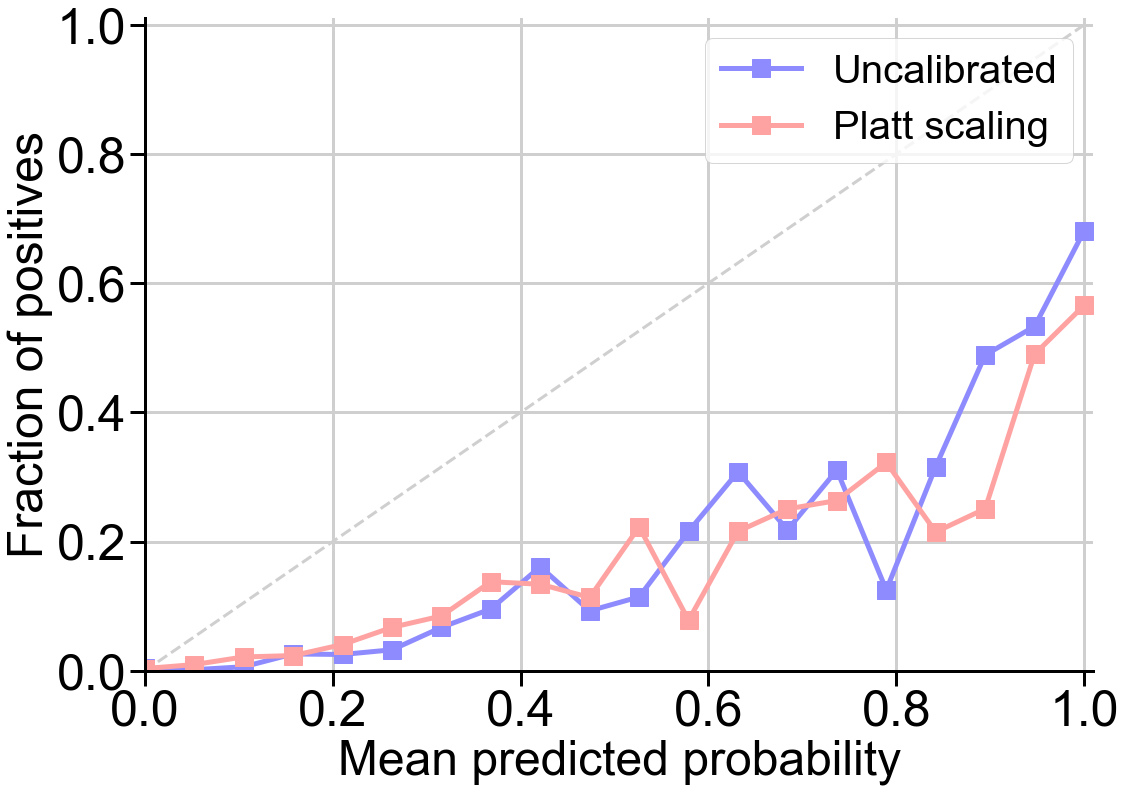

In [15]:
#calibration curve
calibration=pd.read_csv('G:/AKIprediction/non_SMOTE_result/surgery24_result/calibration_curvesurgery24_ourmodel.csv',encoding='gbk')
re_calibration=pd.read_csv('G:/AKIprediction/non_SMOTE_result/surgery24_result/re_calibration_curvesurgery24_ourmodel.csv',encoding='gbk')
fig, ax = plt.subplots(figsize = (17, 12))
plt.plot([0, 1], [0, 1], linestyle="--", lw=3, color="#CFCFCF")
plt.grid(color='#CFCFCF',lw=3)
plt.plot(calibration['mean_prob_pred'], calibration['mean_prob_trues'],color='#8E8BFE',linewidth=5,marker="s",markersize=18,label='Uncalibrated')
plt.plot(re_calibration['mean_prob_pred'], re_calibration['mean_prob_trues'],color='#FEA3A2',linewidth=5,marker="s",markersize=18,label='Platt scaling')
font2 = {'family' : 'Arial',
'weight' : 'normal',
'size'   : 48,
}
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(True)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(True)    
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()
ax.spines['bottom'].set_linewidth(3)
ax.spines['left'].set_linewidth(3)
ax.axis([0,1.01,0,1.01])
plt.yticks(np.arange(0, 1.2, 0.2))
plt.xticks(np.arange(0, 1.2, 0.2))
plt.tick_params(labelsize=50)
plt.tick_params(which='major',width=3,length=15)
labels = ax.get_xticklabels() + ax.get_yticklabels()
[label.set_fontname('Arial') for label in labels]
plt.xlabel('Mean predicted probability',font2)
plt.ylabel('Fraction of positives',font2)
plt.legend(loc="upper right",prop={'size':40,'family' : 'Arial','weight' : 'normal'})
plt.savefig('G:/AKIprediction/non_SMOTE_result/calibration_curve_ourmodel.tiff',bbox_inches = 'tight',dpi=300)

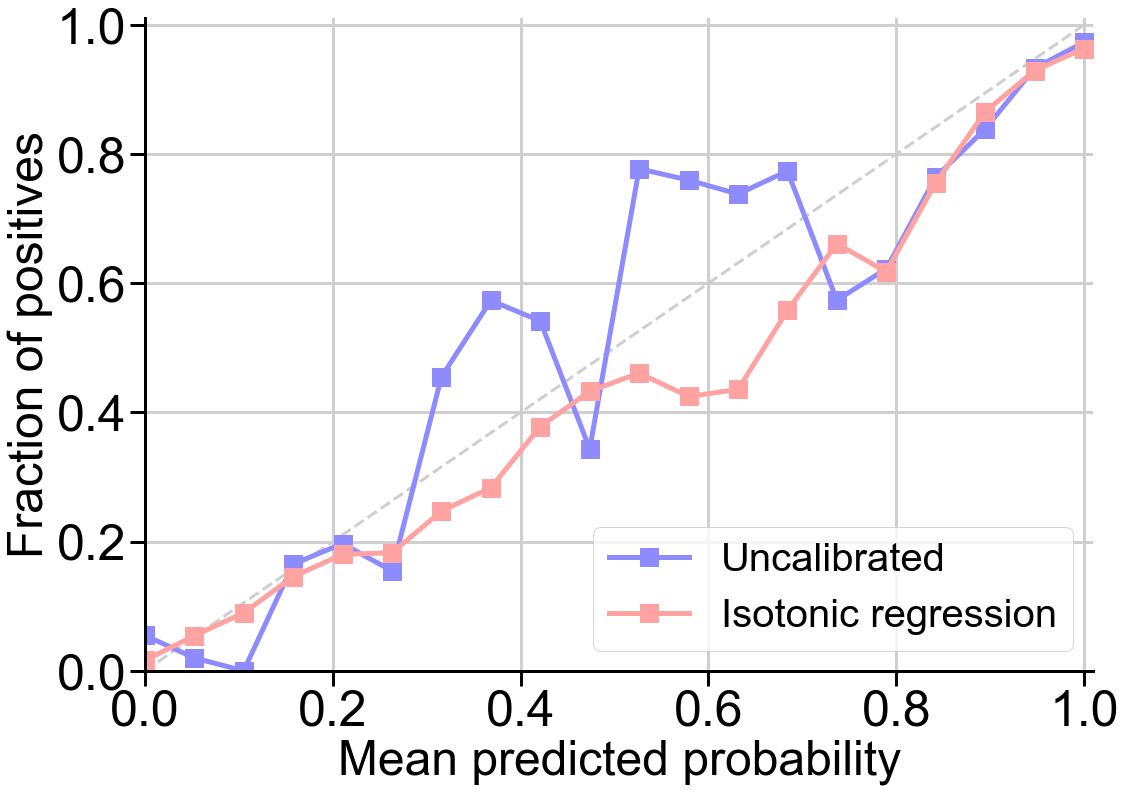

In [13]:
#calibration curve
calibration=pd.read_csv('G:/AKIprediction/SMOTE_result/surgery24_result/calibration_curvesurgery24_ourmodel.csv',encoding='gbk')
re_calibration=pd.read_csv('G:/AKIprediction/SMOTE_result/surgery24_result/re_calibration_curvesurgery24_ourmodel.csv',encoding='gbk')
fig, ax = plt.subplots(figsize = (17, 12))
plt.plot([0, 1], [0, 1], linestyle="--", lw=3, color="#CFCFCF")
plt.grid(color='#CFCFCF',lw=3)
plt.plot(calibration['mean_prob_pred'], calibration['mean_prob_trues'],color='#8E8BFE',linewidth=5,marker="s",markersize=18,label='Uncalibrated')
plt.plot(re_calibration['mean_prob_pred'], re_calibration['mean_prob_trues'],color='#FEA3A2',linewidth=5,marker="s",markersize=18,label='Isotonic regression')
font2 = {'family' : 'Arial',
'weight' : 'normal',
'size'   : 48,
}
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(True)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(True)    
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()
ax.spines['bottom'].set_linewidth(3)
ax.spines['left'].set_linewidth(3)
ax.axis([0,1.01,0,1.01])
plt.yticks(np.arange(0, 1.2, 0.2))
plt.xticks(np.arange(0, 1.2, 0.2))
plt.tick_params(labelsize=50)
plt.tick_params(which='major',width=3,length=15)
labels = ax.get_xticklabels() + ax.get_yticklabels()
[label.set_fontname('Arial') for label in labels]
plt.xlabel('Mean predicted probability',font2)
plt.ylabel('Fraction of positives',font2)
plt.legend(loc="lower right",prop={'size':40,'family' : 'Arial','weight' : 'normal'})
plt.savefig('G:/AKIprediction/SMOTE_result/calibration_curve_ourmodel.tiff',bbox_inches = 'tight',dpi=300)

In [80]:
#attentionmap
attention_weight=np.load('G:/AKIprediction/SMOTE_result/surgery24_result/attention_surgery24_ourmodel.npy')
attention_weight=np.squeeze(attention_weight,axis=1)
attention_weight=np.sum(attention_weight,axis=1)
attention_weight=attention_weight[:,190:]
attention_weight[attention_weight>6]=6
attention_weight=attention_weight+1
attention_weight=np.log(attention_weight)
attention_weight=attention_weight.T

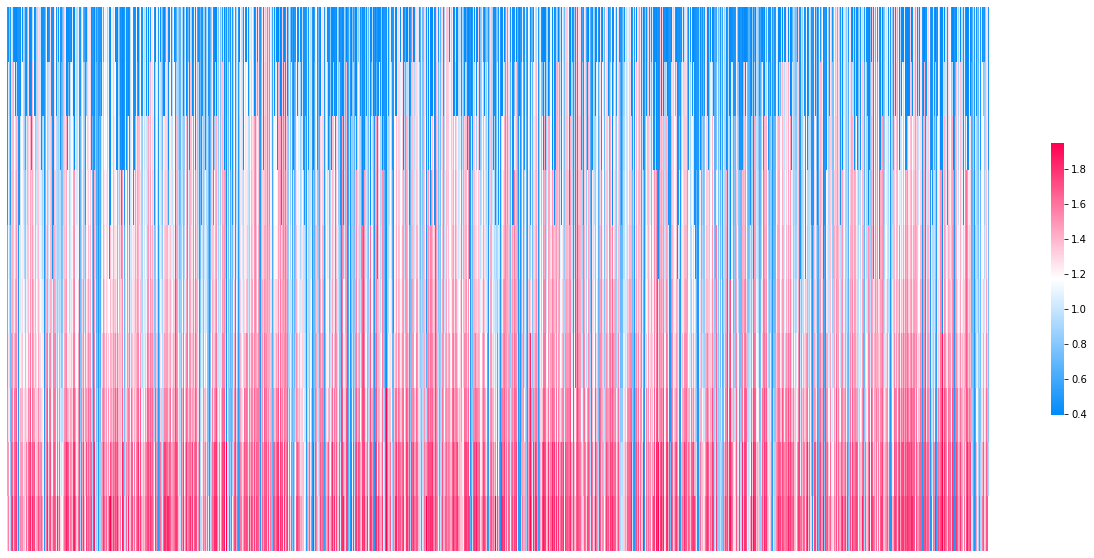

In [81]:
import seaborn as sns
fig, ax = plt.subplots(figsize = (22, 10))
sns.heatmap(attention_weight,cmap=red_white_blue,cbar_kws={'shrink':0.5},xticklabels=False, yticklabels=False)
plt.savefig('G:/AKIprediction/attention_map.tiff',bbox_inches = 'tight',dpi=300)

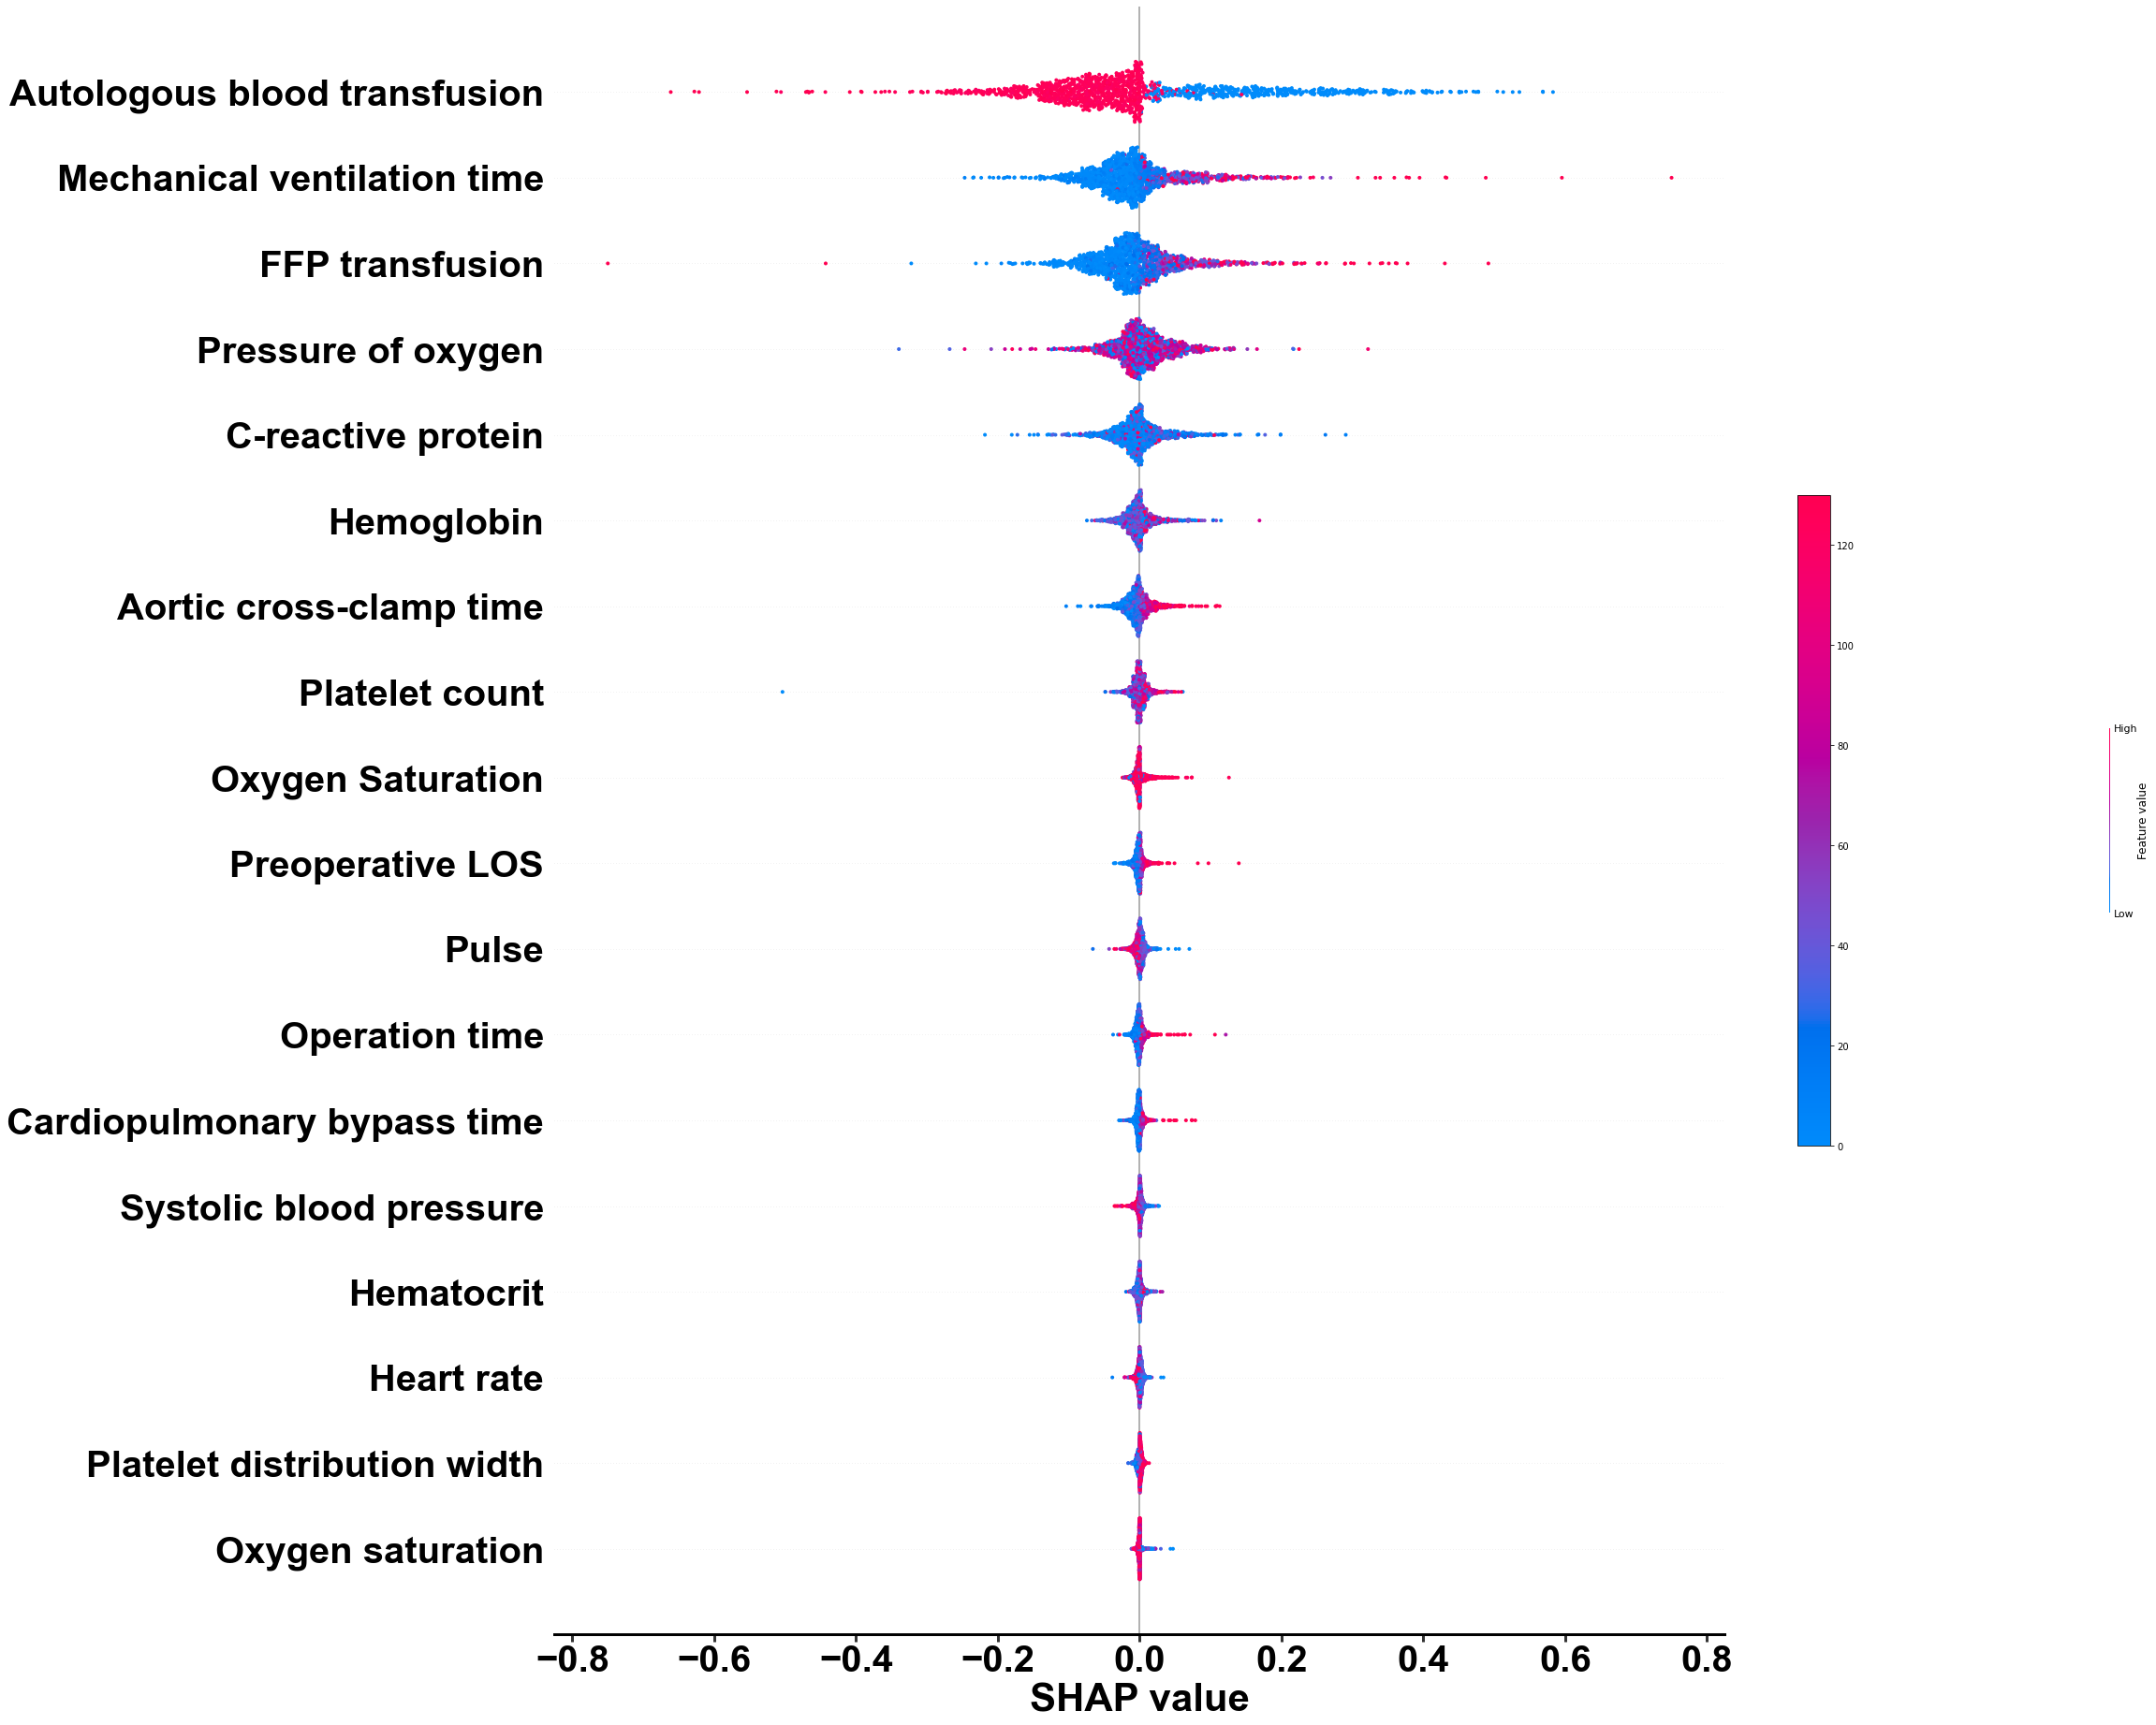

In [311]:
shapplot('surgery24','ourmodel')

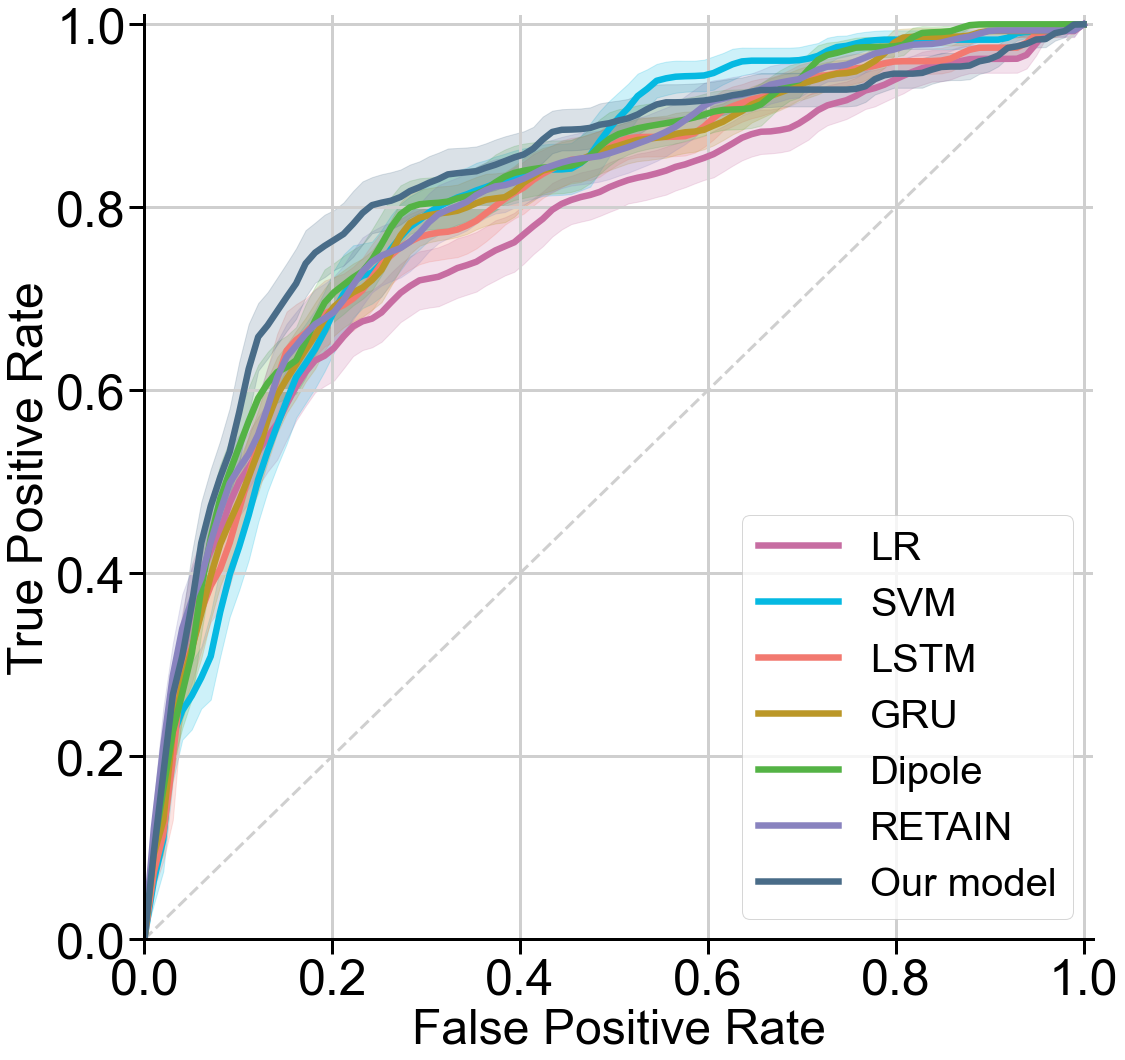

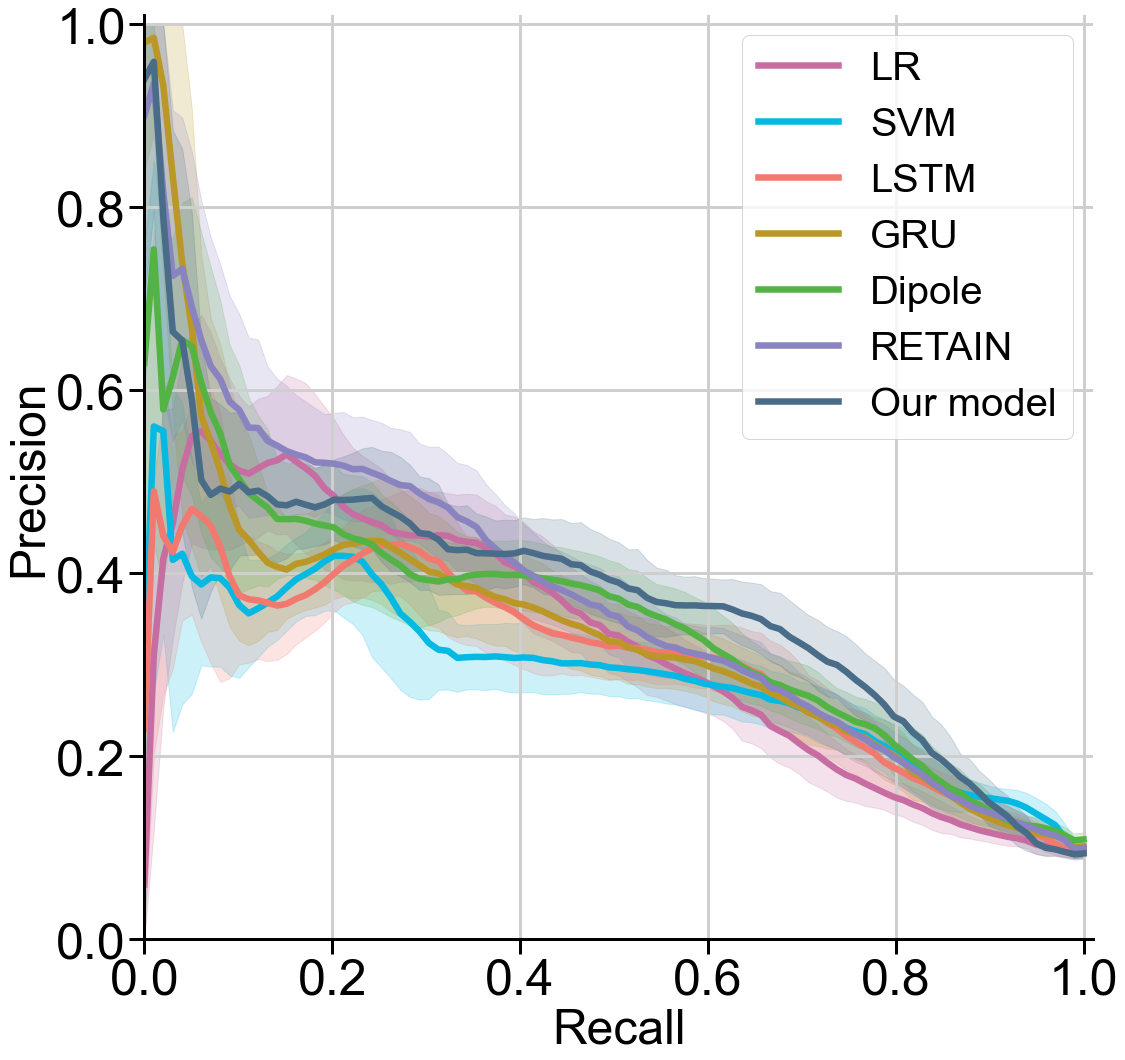

In [98]:
roccurve('random168')
prcurve('random168')

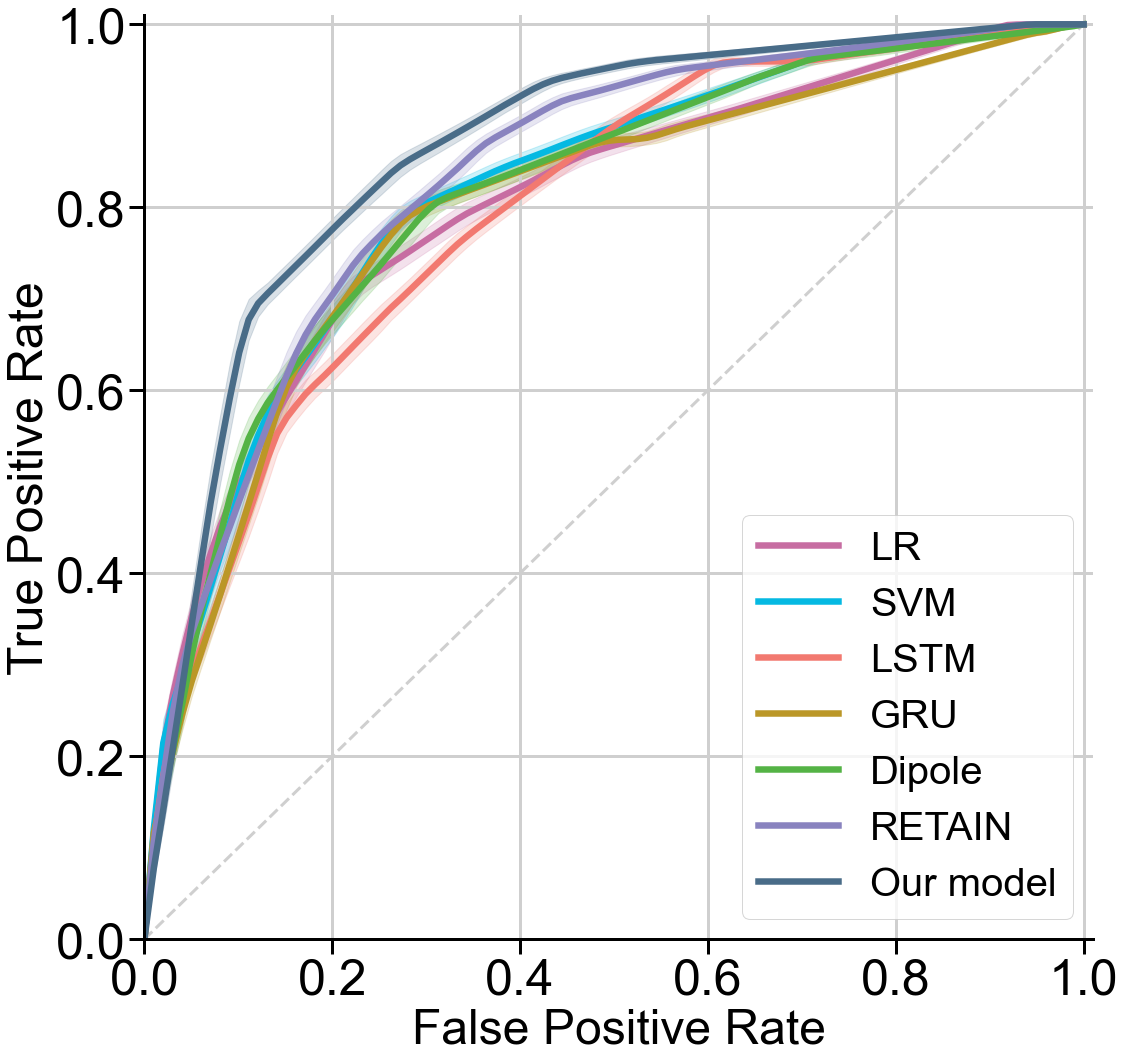

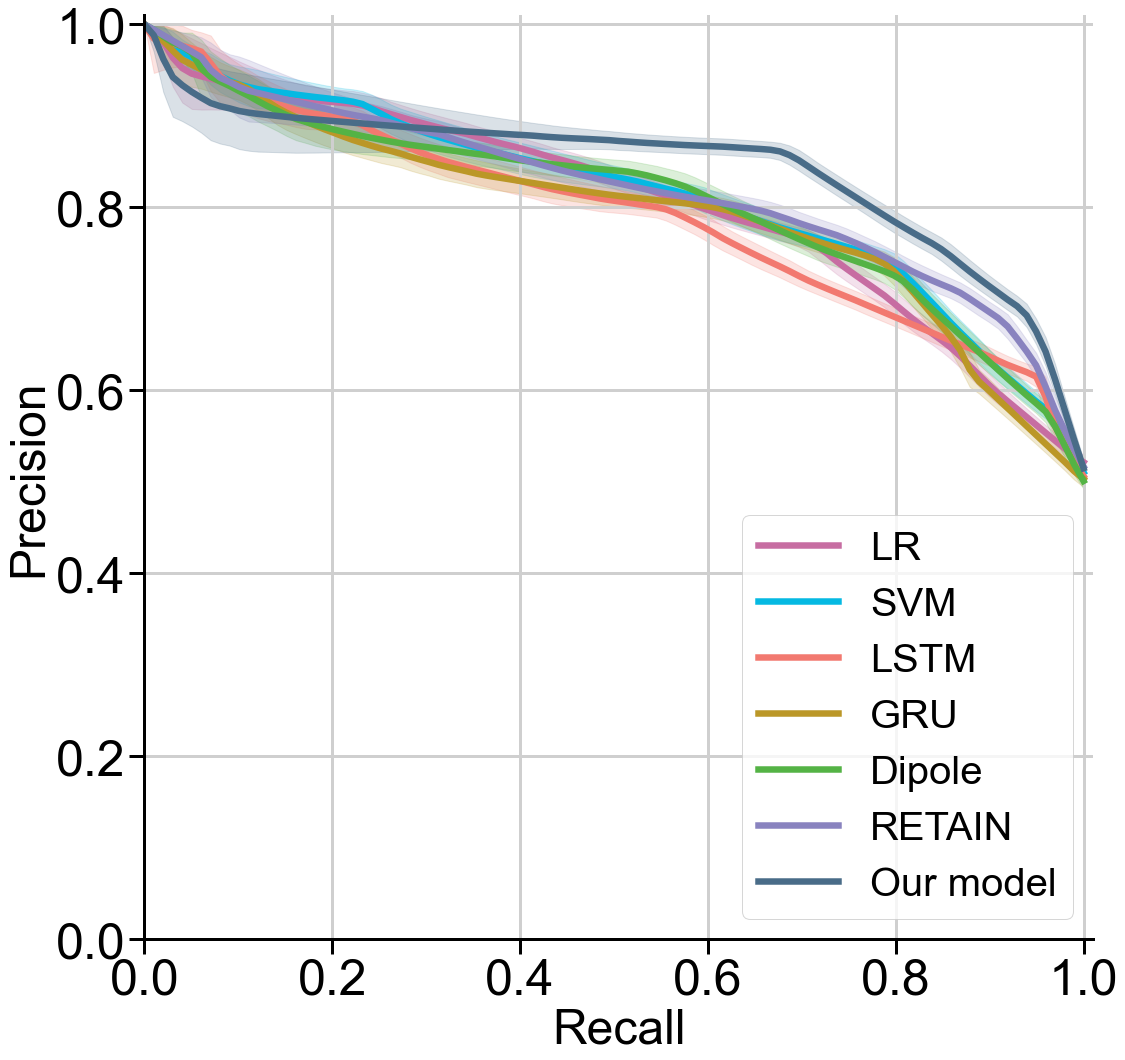

In [353]:
smote_roccurve('onset72')
smote_prcurve('onset72')

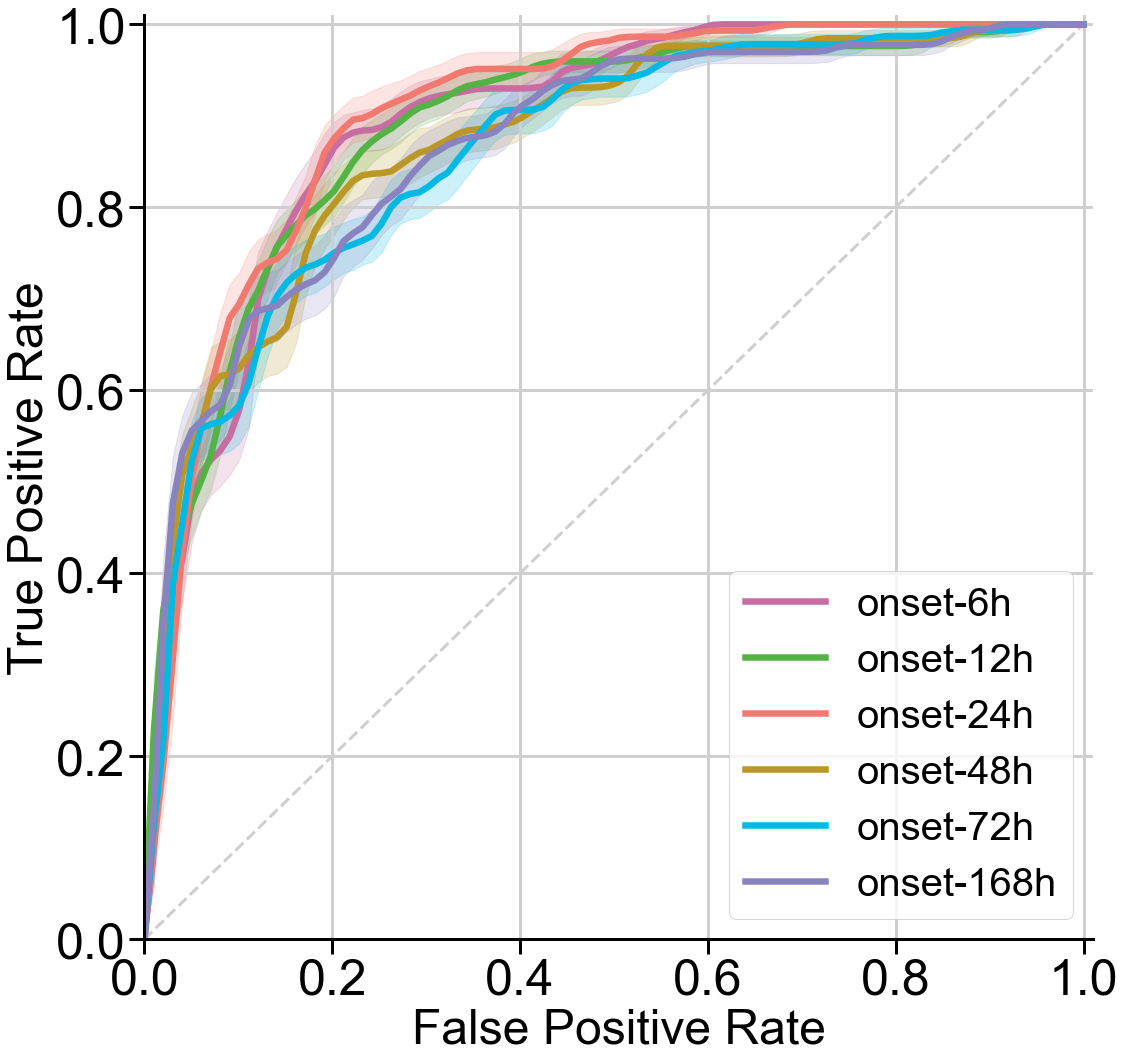

In [75]:
#ROC curve
roc_curve_onset6=pd.read_csv('G:/AKIprediction/non_SMOTE_result/onset6_result/roc_curveonset6_ourmodel.csv',encoding='gbk')
roc_curve_onset12=pd.read_csv('G:/AKIprediction/non_SMOTE_result/onset12_result/roc_curveonset12_ourmodel.csv',encoding='gbk')
roc_curve_onset24=pd.read_csv('G:/AKIprediction/non_SMOTE_result/onset24_result/roc_curveonset24_ourmodel.csv',encoding='gbk')
roc_curve_onset48=pd.read_csv('G:/AKIprediction/non_SMOTE_result/onset48_result/roc_curveonset48_ourmodel.csv',encoding='gbk')
roc_curve_onset72=pd.read_csv('G:/AKIprediction/non_SMOTE_result/onset72_result/roc_curveonset72_ourmodel.csv',encoding='gbk')
roc_curve_onset168=pd.read_csv('G:/AKIprediction/non_SMOTE_result/onset168_result/roc_curveonset168_ourmodel.csv',encoding='gbk')
fig, ax = plt.subplots(figsize = (17, 17))
plt.grid(color='#CFCFCF',lw=3)
plt.plot([0, 1], [0, 1], linestyle="--", lw=3, color="#CFCFCF")
plt.plot(roc_curve_onset6['mean_fpr'], roc_curve_onset6['mean_tpr'], label='onset-6h', color='#C76DA2',linewidth=6.5)
plt.plot(roc_curve_onset12['mean_fpr'], roc_curve_onset12['mean_tpr'], label='onset-12h', color='#54B345',linewidth=6.5)
plt.plot(roc_curve_onset24['mean_fpr'], roc_curve_onset24['mean_tpr'], label='onset-24h', color='#F27970',linewidth=6.5)
plt.plot(roc_curve_onset48['mean_fpr'], roc_curve_onset48['mean_tpr'], label='onset-48h', color='#BB9727',linewidth=6.5)
plt.plot(roc_curve_onset72['mean_fpr'], roc_curve_onset72['mean_tpr'], label='onset-72h', color='#05B9E2',linewidth=6.5)
plt.plot(roc_curve_onset168['mean_fpr'], roc_curve_onset168['mean_tpr'], label='onset-168h', color='#8983BF',linewidth=6.5)
plt.fill_between(roc_curve_onset6['mean_fpr'],roc_curve_onset6['tprs_lower'],roc_curve_onset6['tprs_upper'],color="#C76DA2",alpha=0.2)
plt.fill_between(roc_curve_onset12['mean_fpr'],roc_curve_onset12['tprs_lower'],roc_curve_onset12['tprs_upper'],color='#54B345',alpha=0.2)
plt.fill_between(roc_curve_onset24['mean_fpr'],roc_curve_onset24['tprs_lower'],roc_curve_onset24['tprs_upper'],color="#F27970",alpha=0.2)
plt.fill_between(roc_curve_onset48['mean_fpr'],roc_curve_onset48['tprs_lower'],roc_curve_onset48['tprs_upper'],color='#BB9727',alpha=0.2)
plt.fill_between(roc_curve_onset72['mean_fpr'],roc_curve_onset72['tprs_lower'],roc_curve_onset72['tprs_upper'],color="#05B9E2",alpha=0.2)
plt.fill_between(roc_curve_onset168['mean_fpr'],roc_curve_onset168['tprs_lower'],roc_curve_onset168['tprs_upper'],color='#8983BF',alpha=0.2)
font2 = {'family' : 'Arial',
'weight' : 'normal',
'size'   : 48,
}
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(True)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(True)    
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()
ax.spines['bottom'].set_linewidth(3)
ax.spines['left'].set_linewidth(3)
ax.axis([0,1.01,0,1.01])
plt.yticks(np.arange(0, 1.2, 0.2))
plt.xticks(np.arange(0, 1.2, 0.2))
plt.tick_params(labelsize=50)
plt.tick_params(which='major',width=3,length=15)
labels = ax.get_xticklabels() + ax.get_yticklabels()
[label.set_fontname('Arial') for label in labels]
plt.xlabel('False Positive Rate',font2)
plt.ylabel('True Positive Rate',font2)
plt.legend(loc="lower right",prop={'size':40,'family' : 'Arial','weight' : 'normal'})
plt.savefig('G:/AKIprediction/non_SMOTE_result/ROC_curve_ourmodel_P1.tiff',bbox_inches = 'tight',dpi=300)

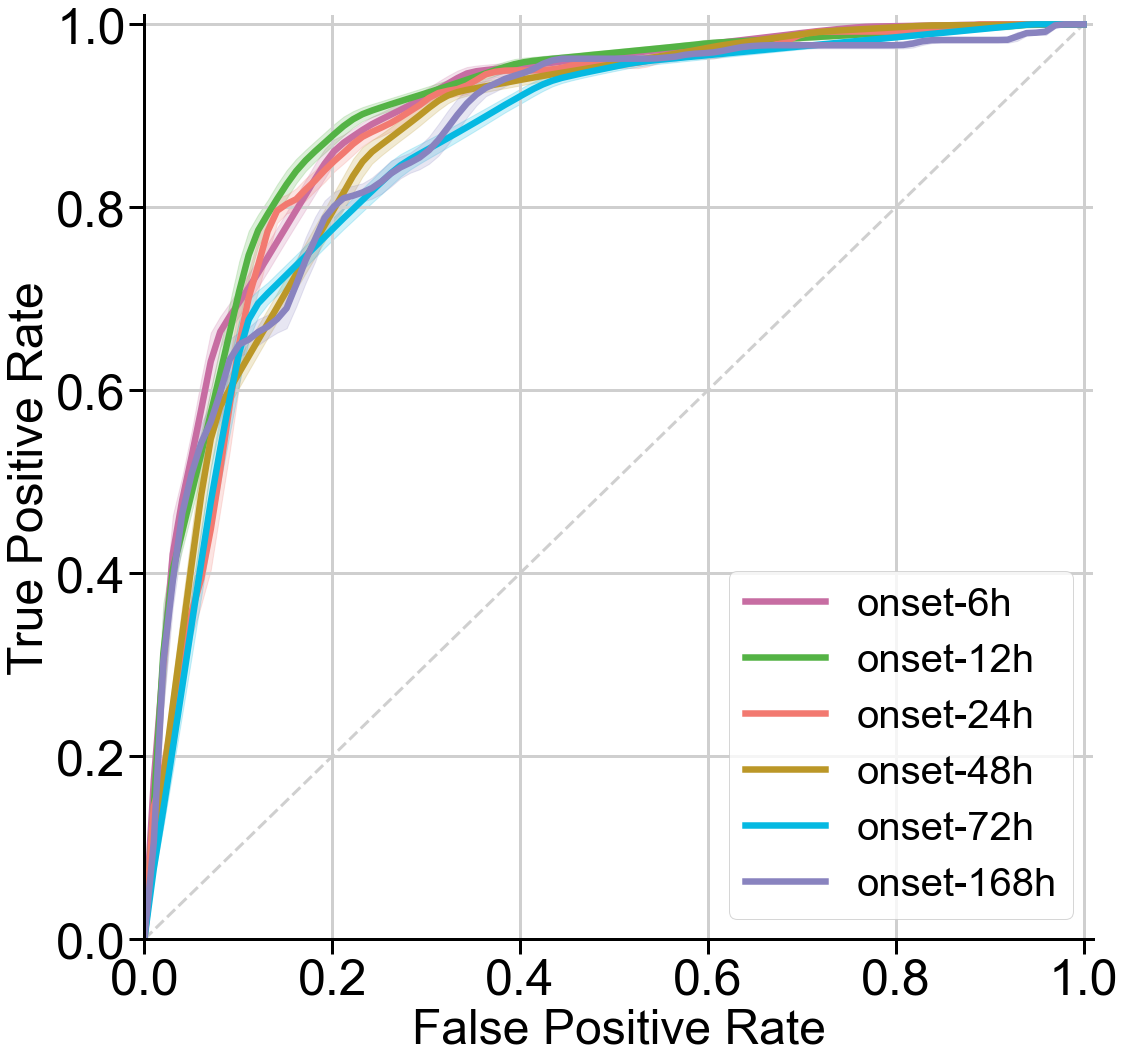

In [355]:
#ROC curve
roc_curve_onset6=pd.read_csv('G:/AKIprediction/SMOTE_result/onset6_result/roc_curveonset6_ourmodel.csv',encoding='gbk')
roc_curve_onset12=pd.read_csv('G:/AKIprediction/SMOTE_result/onset12_result/roc_curveonset12_ourmodel.csv',encoding='gbk')
roc_curve_onset24=pd.read_csv('G:/AKIprediction/SMOTE_result/onset24_result/roc_curveonset24_ourmodel.csv',encoding='gbk')
roc_curve_onset48=pd.read_csv('G:/AKIprediction/SMOTE_result/onset48_result/roc_curveonset48_ourmodel.csv',encoding='gbk')
roc_curve_onset72=pd.read_csv('G:/AKIprediction/SMOTE_result/onset72_result/roc_curveonset72_ourmodel.csv',encoding='gbk')
roc_curve_onset168=pd.read_csv('G:/AKIprediction/SMOTE_result/onset168_result/roc_curveonset168_ourmodel.csv',encoding='gbk')
fig, ax = plt.subplots(figsize = (17, 17))
plt.grid(color='#CFCFCF',lw=3)
plt.plot([0, 1], [0, 1], linestyle="--", lw=3, color="#CFCFCF")
plt.plot(roc_curve_onset6['mean_fpr'], roc_curve_onset6['mean_tpr'], label='onset-6h', color='#C76DA2',linewidth=6.5)
plt.plot(roc_curve_onset12['mean_fpr'], roc_curve_onset12['mean_tpr'], label='onset-12h', color='#54B345',linewidth=6.5)
plt.plot(roc_curve_onset24['mean_fpr'], roc_curve_onset24['mean_tpr'], label='onset-24h', color='#F27970',linewidth=6.5)
plt.plot(roc_curve_onset48['mean_fpr'], roc_curve_onset48['mean_tpr'], label='onset-48h', color='#BB9727',linewidth=6.5)
plt.plot(roc_curve_onset72['mean_fpr'], roc_curve_onset72['mean_tpr'], label='onset-72h', color='#05B9E2',linewidth=6.5)
plt.plot(roc_curve_onset168['mean_fpr'], roc_curve_onset168['mean_tpr'], label='onset-168h', color='#8983BF',linewidth=6.5)
plt.fill_between(roc_curve_onset6['mean_fpr'],roc_curve_onset6['tprs_lower'],roc_curve_onset6['tprs_upper'],color="#C76DA2",alpha=0.2)
plt.fill_between(roc_curve_onset12['mean_fpr'],roc_curve_onset12['tprs_lower'],roc_curve_onset12['tprs_upper'],color='#54B345',alpha=0.2)
plt.fill_between(roc_curve_onset24['mean_fpr'],roc_curve_onset24['tprs_lower'],roc_curve_onset24['tprs_upper'],color="#F27970",alpha=0.2)
plt.fill_between(roc_curve_onset48['mean_fpr'],roc_curve_onset48['tprs_lower'],roc_curve_onset48['tprs_upper'],color='#BB9727',alpha=0.2)
plt.fill_between(roc_curve_onset72['mean_fpr'],roc_curve_onset72['tprs_lower'],roc_curve_onset72['tprs_upper'],color="#05B9E2",alpha=0.2)
plt.fill_between(roc_curve_onset168['mean_fpr'],roc_curve_onset168['tprs_lower'],roc_curve_onset168['tprs_upper'],color='#8983BF',alpha=0.2)
font2 = {'family' : 'Arial',
'weight' : 'normal',
'size'   : 48,
}
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(True)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(True)    
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()
ax.spines['bottom'].set_linewidth(3)
ax.spines['left'].set_linewidth(3)
ax.axis([0,1.01,0,1.01])
plt.yticks(np.arange(0, 1.2, 0.2))
plt.xticks(np.arange(0, 1.2, 0.2))
plt.tick_params(labelsize=50)
plt.tick_params(which='major',width=3,length=15)
labels = ax.get_xticklabels() + ax.get_yticklabels()
[label.set_fontname('Arial') for label in labels]
plt.xlabel('False Positive Rate',font2)
plt.ylabel('True Positive Rate',font2)
plt.legend(loc="lower right",prop={'size':40,'family' : 'Arial','weight' : 'normal'})
plt.savefig('G:/AKIprediction/SMOTE_result/ROC_curve_ourmodel_P1.tiff',bbox_inches = 'tight',dpi=300)

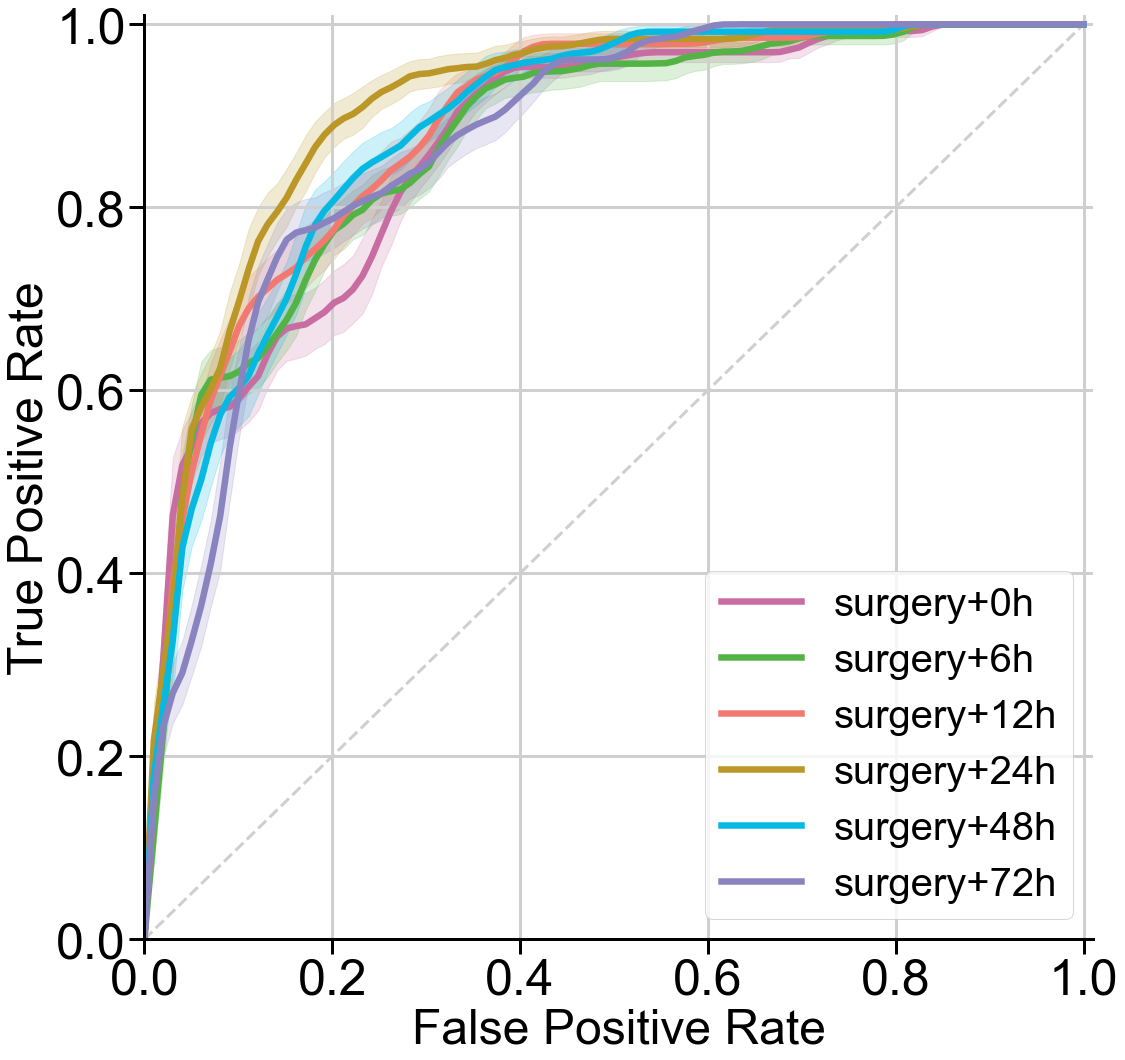

In [78]:
#ROC curve
roc_curve_onset6=pd.read_csv('G:/AKIprediction/non_SMOTE_result/surgery0_result/roc_curvesurgery0_ourmodel.csv',encoding='gbk')
roc_curve_onset12=pd.read_csv('G:/AKIprediction/non_SMOTE_result/surgery6_result/roc_curvesurgery6_ourmodel.csv',encoding='gbk')
roc_curve_onset24=pd.read_csv('G:/AKIprediction/non_SMOTE_result/surgery12_result/roc_curvesurgery12_ourmodel.csv',encoding='gbk')
roc_curve_onset48=pd.read_csv('G:/AKIprediction/non_SMOTE_result/surgery24_result/roc_curvesurgery24_ourmodel.csv',encoding='gbk')
roc_curve_onset72=pd.read_csv('G:/AKIprediction/non_SMOTE_result/surgery48_result/roc_curvesurgery48_ourmodel.csv',encoding='gbk')
roc_curve_onset168=pd.read_csv('G:/AKIprediction/non_SMOTE_result/surgery72_result/roc_curvesurgery72_ourmodel.csv',encoding='gbk')
fig, ax = plt.subplots(figsize = (17, 17))
plt.grid(color='#CFCFCF',lw=3)
plt.plot([0, 1], [0, 1], linestyle="--", lw=3, color="#CFCFCF")
plt.plot(roc_curve_onset6['mean_fpr'], roc_curve_onset6['mean_tpr'], label='surgery+0h', color='#C76DA2',linewidth=6.5)
plt.plot(roc_curve_onset12['mean_fpr'], roc_curve_onset12['mean_tpr'], label='surgery+6h', color='#54B345',linewidth=6.5)
plt.plot(roc_curve_onset24['mean_fpr'], roc_curve_onset24['mean_tpr'], label='surgery+12h', color='#F27970',linewidth=6.5)
plt.plot(roc_curve_onset48['mean_fpr'], roc_curve_onset48['mean_tpr'], label='surgery+24h', color='#BB9727',linewidth=6.5)
plt.plot(roc_curve_onset72['mean_fpr'], roc_curve_onset72['mean_tpr'], label='surgery+48h', color='#05B9E2',linewidth=6.5)
plt.plot(roc_curve_onset168['mean_fpr'], roc_curve_onset168['mean_tpr'], label='surgery+72h', color='#8983BF',linewidth=6.5)
plt.fill_between(roc_curve_onset6['mean_fpr'],roc_curve_onset6['tprs_lower'],roc_curve_onset6['tprs_upper'],color="#C76DA2",alpha=0.2)
plt.fill_between(roc_curve_onset12['mean_fpr'],roc_curve_onset12['tprs_lower'],roc_curve_onset12['tprs_upper'],color='#54B345',alpha=0.2)
plt.fill_between(roc_curve_onset24['mean_fpr'],roc_curve_onset24['tprs_lower'],roc_curve_onset24['tprs_upper'],color="#F27970",alpha=0.2)
plt.fill_between(roc_curve_onset48['mean_fpr'],roc_curve_onset48['tprs_lower'],roc_curve_onset48['tprs_upper'],color='#BB9727',alpha=0.2)
plt.fill_between(roc_curve_onset72['mean_fpr'],roc_curve_onset72['tprs_lower'],roc_curve_onset72['tprs_upper'],color="#05B9E2",alpha=0.2)
plt.fill_between(roc_curve_onset168['mean_fpr'],roc_curve_onset168['tprs_lower'],roc_curve_onset168['tprs_upper'],color='#8983BF',alpha=0.2)
font2 = {'family' : 'Arial',
'weight' : 'normal',
'size'   : 48,
}
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(True)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(True)    
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()
ax.spines['bottom'].set_linewidth(3)
ax.spines['left'].set_linewidth(3)
ax.axis([0,1.01,0,1.01])
plt.yticks(np.arange(0, 1.2, 0.2))
plt.xticks(np.arange(0, 1.2, 0.2))
plt.tick_params(labelsize=50)
plt.tick_params(which='major',width=3,length=15)
labels = ax.get_xticklabels() + ax.get_yticklabels()
[label.set_fontname('Arial') for label in labels]
plt.xlabel('False Positive Rate',font2)
plt.ylabel('True Positive Rate',font2)
plt.legend(loc="lower right",prop={'size':40,'family' : 'Arial','weight' : 'normal'})
plt.savefig('G:/AKIprediction/non_SMOTE_result/ROC_curve_ourmodel_P2.tiff',bbox_inches = 'tight',dpi=300)

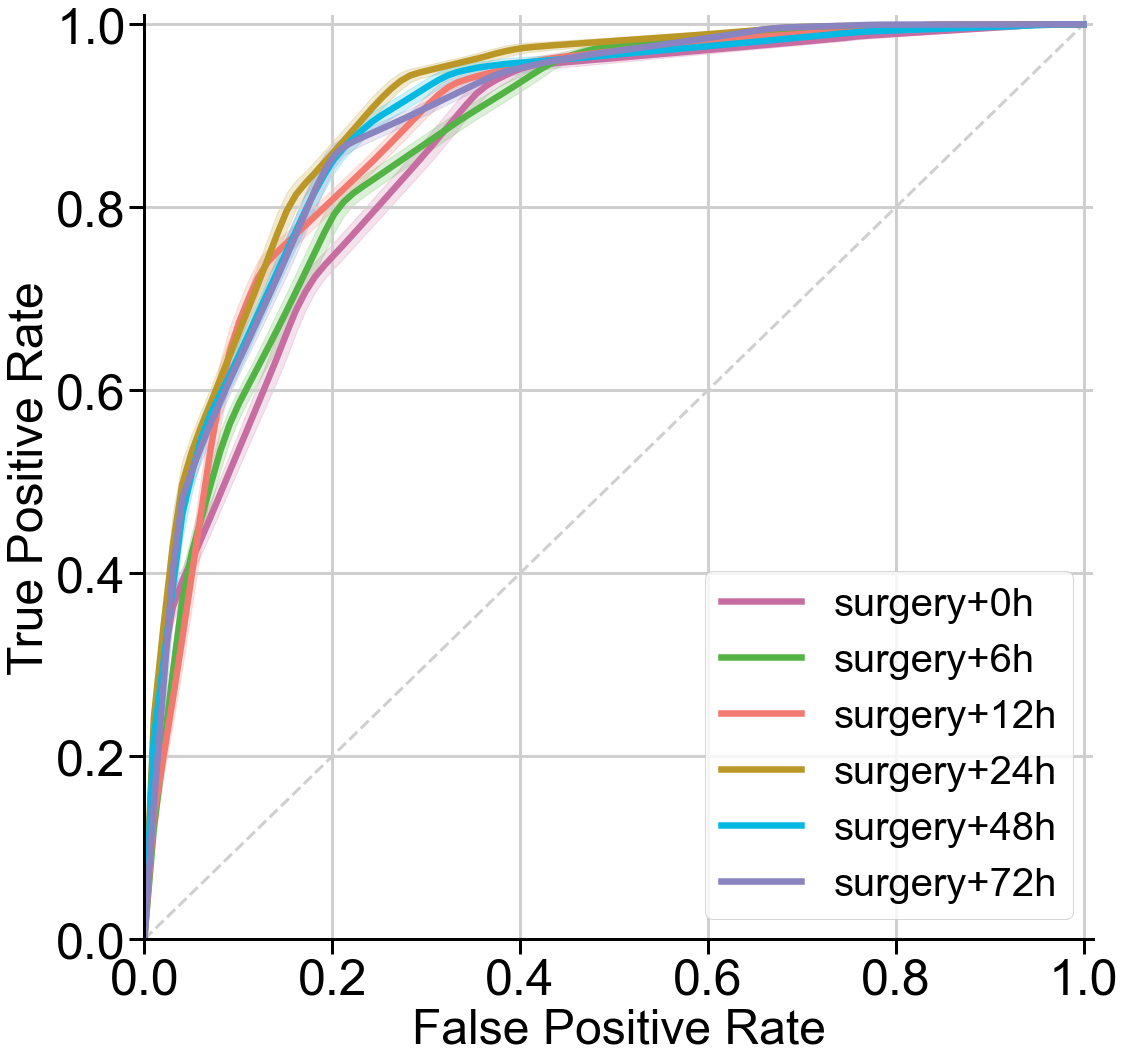

In [354]:
#ROC curve
roc_curve_onset6=pd.read_csv('G:/AKIprediction/SMOTE_result/surgery0_result/roc_curvesurgery0_ourmodel.csv',encoding='gbk')
roc_curve_onset12=pd.read_csv('G:/AKIprediction/SMOTE_result/surgery6_result/roc_curvesurgery6_ourmodel.csv',encoding='gbk')
roc_curve_onset24=pd.read_csv('G:/AKIprediction/SMOTE_result/surgery12_result/roc_curvesurgery12_ourmodel.csv',encoding='gbk')
roc_curve_onset48=pd.read_csv('G:/AKIprediction/SMOTE_result/surgery24_result/roc_curvesurgery24_ourmodel.csv',encoding='gbk')
roc_curve_onset72=pd.read_csv('G:/AKIprediction/SMOTE_result/surgery48_result/roc_curvesurgery48_ourmodel.csv',encoding='gbk')
roc_curve_onset168=pd.read_csv('G:/AKIprediction/SMOTE_result/surgery72_result/roc_curvesurgery72_ourmodel.csv',encoding='gbk')
fig, ax = plt.subplots(figsize = (17, 17))
plt.grid(color='#CFCFCF',lw=3)
plt.plot([0, 1], [0, 1], linestyle="--", lw=3, color="#CFCFCF")
plt.plot(roc_curve_onset6['mean_fpr'], roc_curve_onset6['mean_tpr'], label='surgery+0h', color='#C76DA2',linewidth=6.5)
plt.plot(roc_curve_onset12['mean_fpr'], roc_curve_onset12['mean_tpr'], label='surgery+6h', color='#54B345',linewidth=6.5)
plt.plot(roc_curve_onset24['mean_fpr'], roc_curve_onset24['mean_tpr'], label='surgery+12h', color='#F27970',linewidth=6.5)
plt.plot(roc_curve_onset48['mean_fpr'], roc_curve_onset48['mean_tpr'], label='surgery+24h', color='#BB9727',linewidth=6.5)
plt.plot(roc_curve_onset72['mean_fpr'], roc_curve_onset72['mean_tpr'], label='surgery+48h', color='#05B9E2',linewidth=6.5)
plt.plot(roc_curve_onset168['mean_fpr'], roc_curve_onset168['mean_tpr'], label='surgery+72h', color='#8983BF',linewidth=6.5)
plt.fill_between(roc_curve_onset6['mean_fpr'],roc_curve_onset6['tprs_lower'],roc_curve_onset6['tprs_upper'],color="#C76DA2",alpha=0.2)
plt.fill_between(roc_curve_onset12['mean_fpr'],roc_curve_onset12['tprs_lower'],roc_curve_onset12['tprs_upper'],color='#54B345',alpha=0.2)
plt.fill_between(roc_curve_onset24['mean_fpr'],roc_curve_onset24['tprs_lower'],roc_curve_onset24['tprs_upper'],color="#F27970",alpha=0.2)
plt.fill_between(roc_curve_onset48['mean_fpr'],roc_curve_onset48['tprs_lower'],roc_curve_onset48['tprs_upper'],color='#BB9727',alpha=0.2)
plt.fill_between(roc_curve_onset72['mean_fpr'],roc_curve_onset72['tprs_lower'],roc_curve_onset72['tprs_upper'],color="#05B9E2",alpha=0.2)
plt.fill_between(roc_curve_onset168['mean_fpr'],roc_curve_onset168['tprs_lower'],roc_curve_onset168['tprs_upper'],color='#8983BF',alpha=0.2)
font2 = {'family' : 'Arial',
'weight' : 'normal',
'size'   : 48,
}
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(True)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(True)    
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()
ax.spines['bottom'].set_linewidth(3)
ax.spines['left'].set_linewidth(3)
ax.axis([0,1.01,0,1.01])
plt.yticks(np.arange(0, 1.2, 0.2))
plt.xticks(np.arange(0, 1.2, 0.2))
plt.tick_params(labelsize=50)
plt.tick_params(which='major',width=3,length=15)
labels = ax.get_xticklabels() + ax.get_yticklabels()
[label.set_fontname('Arial') for label in labels]
plt.xlabel('False Positive Rate',font2)
plt.ylabel('True Positive Rate',font2)
plt.legend(loc="lower right",prop={'size':40,'family' : 'Arial','weight' : 'normal'})
plt.savefig('G:/AKIprediction/SMOTE_result/ROC_curve_ourmodel_P2.tiff',bbox_inches = 'tight',dpi=300)

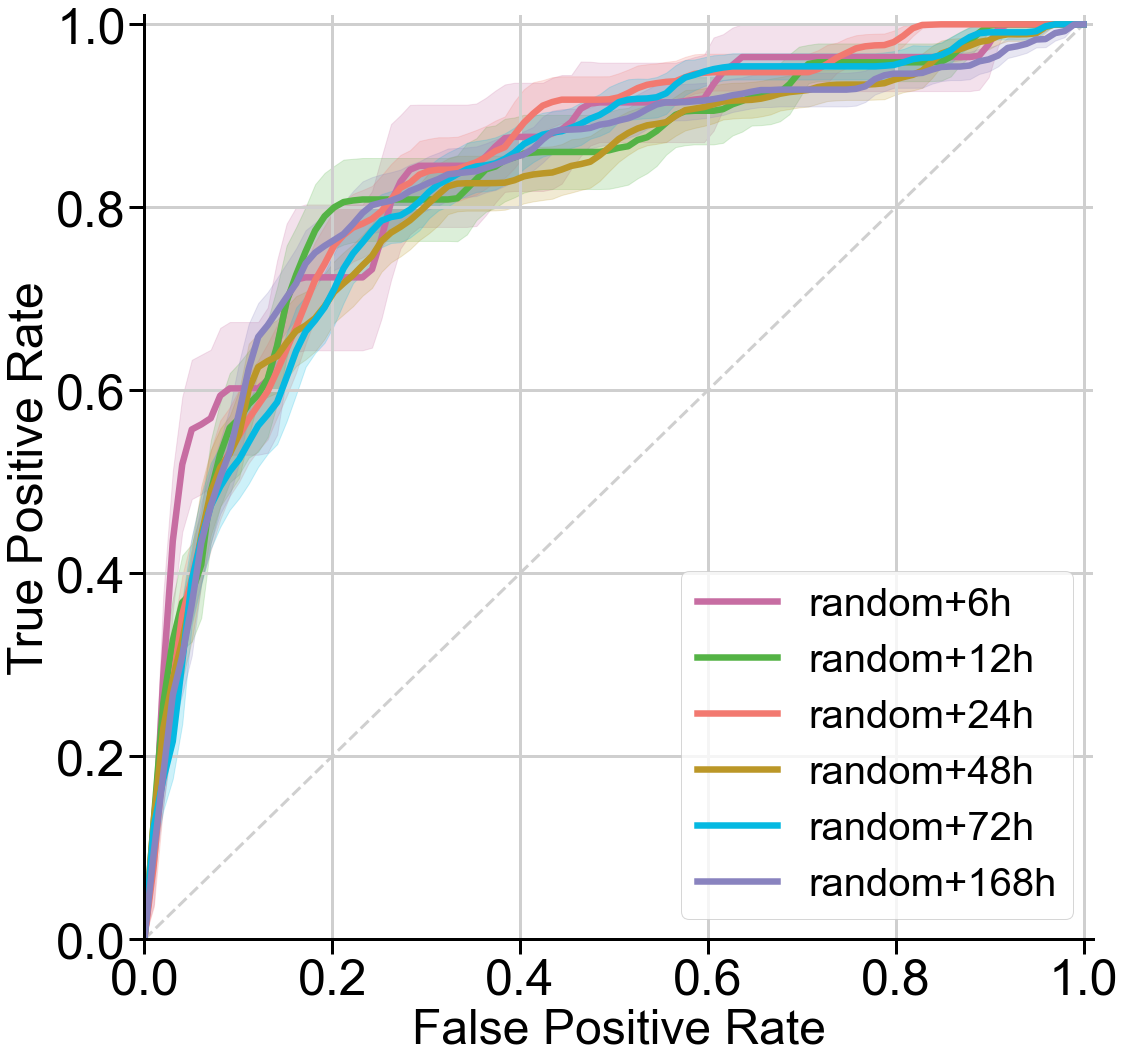

In [344]:
#ROC curve
roc_curve_onset6=pd.read_csv('G:/AKIprediction/non_SMOTE_result/random6_result/roc_curverandom6_ourmodel.csv',encoding='gbk')
roc_curve_onset12=pd.read_csv('G:/AKIprediction/non_SMOTE_result/random12_result/roc_curverandom12_ourmodel.csv',encoding='gbk')
roc_curve_onset24=pd.read_csv('G:/AKIprediction/non_SMOTE_result/random24_result/roc_curverandom24_ourmodel.csv',encoding='gbk')
roc_curve_onset48=pd.read_csv('G:/AKIprediction/non_SMOTE_result/random48_result/roc_curverandom48_ourmodel.csv',encoding='gbk')
roc_curve_onset72=pd.read_csv('G:/AKIprediction/non_SMOTE_result/random72_result/roc_curverandom72_ourmodel.csv',encoding='gbk')
roc_curve_onset168=pd.read_csv('G:/AKIprediction/non_SMOTE_result/random168_result/roc_curverandom168_ourmodel.csv',encoding='gbk')
fig, ax = plt.subplots(figsize = (17, 17))
plt.grid(color='#CFCFCF',lw=3)
plt.plot([0, 1], [0, 1], linestyle="--", lw=3, color="#CFCFCF")
plt.plot(roc_curve_onset6['mean_fpr'], roc_curve_onset6['mean_tpr'], label='random+6h', color='#C76DA2',linewidth=6.5)
plt.plot(roc_curve_onset12['mean_fpr'], roc_curve_onset12['mean_tpr'], label='random+12h', color='#54B345',linewidth=6.5)
plt.plot(roc_curve_onset24['mean_fpr'], roc_curve_onset24['mean_tpr'], label='random+24h', color='#F27970',linewidth=6.5)
plt.plot(roc_curve_onset48['mean_fpr'], roc_curve_onset48['mean_tpr'], label='random+48h', color='#BB9727',linewidth=6.5)
plt.plot(roc_curve_onset72['mean_fpr'], roc_curve_onset72['mean_tpr'], label='random+72h', color='#05B9E2',linewidth=6.5)
plt.plot(roc_curve_onset168['mean_fpr'], roc_curve_onset168['mean_tpr'], label='random+168h', color='#8983BF',linewidth=6.5)
plt.fill_between(roc_curve_onset6['mean_fpr'],roc_curve_onset6['tprs_lower'],roc_curve_onset6['tprs_upper'],color="#C76DA2",alpha=0.2)
plt.fill_between(roc_curve_onset12['mean_fpr'],roc_curve_onset12['tprs_lower'],roc_curve_onset12['tprs_upper'],color='#54B345',alpha=0.2)
plt.fill_between(roc_curve_onset24['mean_fpr'],roc_curve_onset24['tprs_lower'],roc_curve_onset24['tprs_upper'],color="#F27970",alpha=0.2)
plt.fill_between(roc_curve_onset48['mean_fpr'],roc_curve_onset48['tprs_lower'],roc_curve_onset48['tprs_upper'],color='#BB9727',alpha=0.2)
plt.fill_between(roc_curve_onset72['mean_fpr'],roc_curve_onset72['tprs_lower'],roc_curve_onset72['tprs_upper'],color="#05B9E2",alpha=0.2)
plt.fill_between(roc_curve_onset168['mean_fpr'],roc_curve_onset168['tprs_lower'],roc_curve_onset168['tprs_upper'],color='#8983BF',alpha=0.2)
font2 = {'family' : 'Arial',
'weight' : 'normal',
'size'   : 48,
}
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(True)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(True)    
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()
ax.spines['bottom'].set_linewidth(3)
ax.spines['left'].set_linewidth(3)
ax.axis([0,1.01,0,1.01])
plt.yticks(np.arange(0, 1.2, 0.2))
plt.xticks(np.arange(0, 1.2, 0.2))
plt.tick_params(labelsize=50)
plt.tick_params(which='major',width=3,length=15)
labels = ax.get_xticklabels() + ax.get_yticklabels()
[label.set_fontname('Arial') for label in labels]
plt.xlabel('False Positive Rate',font2)
plt.ylabel('True Positive Rate',font2)
plt.legend(loc="lower right",prop={'size':40,'family' : 'Arial','weight' : 'normal'})
plt.savefig('G:/AKIprediction/non_SMOTE_result/ROC_curve_ourmodel_P3.tiff',bbox_inches = 'tight',dpi=300)

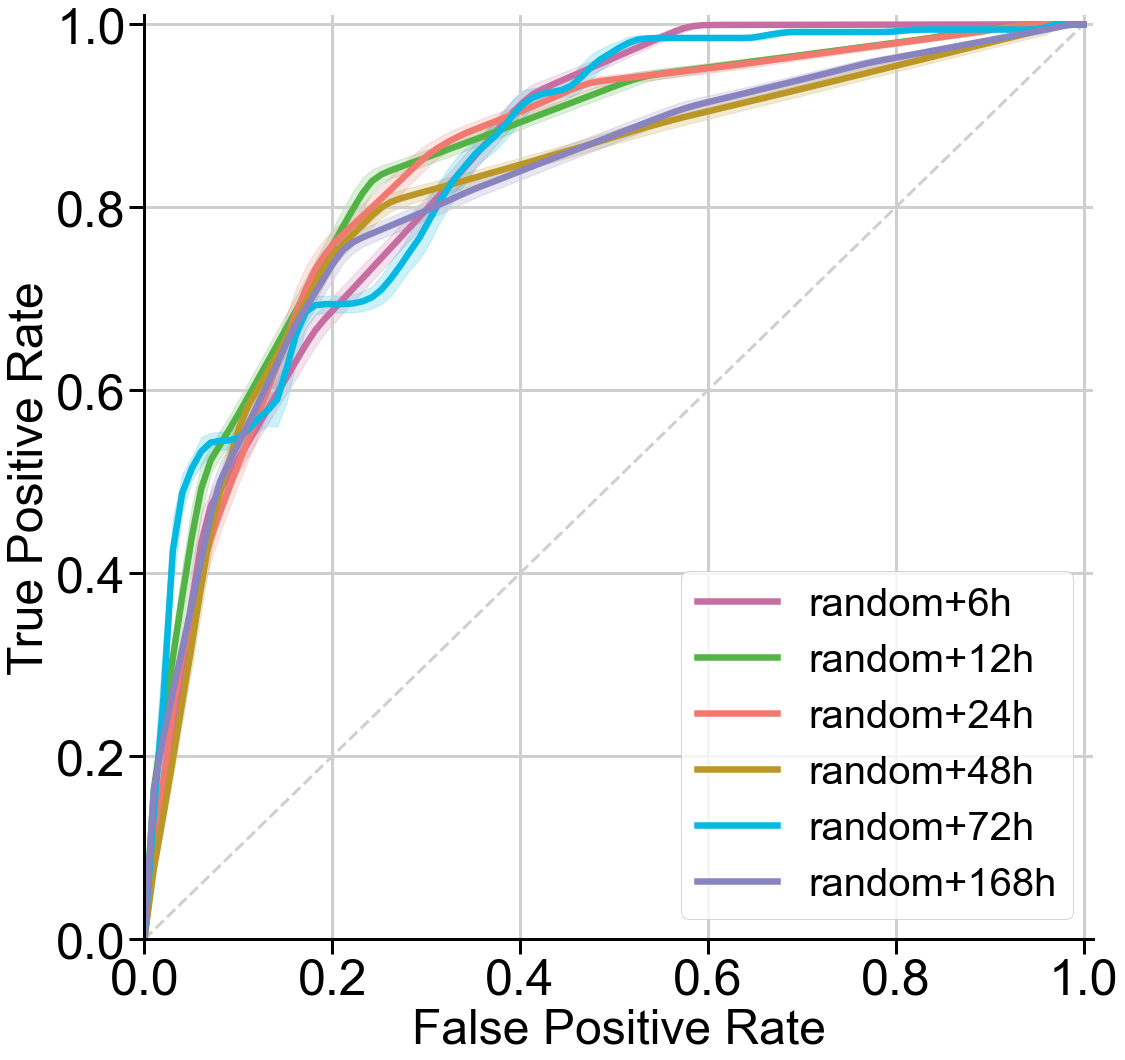

In [348]:
#ROC curve
roc_curve_onset6=pd.read_csv('G:/AKIprediction/SMOTE_result/random6_result/roc_curverandom6_ourmodel.csv',encoding='gbk')
roc_curve_onset12=pd.read_csv('G:/AKIprediction/SMOTE_result/random12_result/roc_curverandom12_ourmodel.csv',encoding='gbk')
roc_curve_onset24=pd.read_csv('G:/AKIprediction/SMOTE_result/random24_result/roc_curverandom24_ourmodel.csv',encoding='gbk')
roc_curve_onset48=pd.read_csv('G:/AKIprediction/SMOTE_result/random48_result/roc_curverandom48_ourmodel.csv',encoding='gbk')
roc_curve_onset72=pd.read_csv('G:/AKIprediction/SMOTE_result/random72_result/roc_curverandom72_ourmodel.csv',encoding='gbk')
roc_curve_onset168=pd.read_csv('G:/AKIprediction/SMOTE_result/random168_result/roc_curverandom168_ourmodel.csv',encoding='gbk')
fig, ax = plt.subplots(figsize = (17, 17))
plt.grid(color='#CFCFCF',lw=3)
plt.plot([0, 1], [0, 1], linestyle="--", lw=3, color="#CFCFCF")
plt.plot(roc_curve_onset6['mean_fpr'], roc_curve_onset6['mean_tpr'], label='random+6h', color='#C76DA2',linewidth=6.5)
plt.plot(roc_curve_onset12['mean_fpr'], roc_curve_onset12['mean_tpr'], label='random+12h', color='#54B345',linewidth=6.5)
plt.plot(roc_curve_onset24['mean_fpr'], roc_curve_onset24['mean_tpr'], label='random+24h', color='#F27970',linewidth=6.5)
plt.plot(roc_curve_onset48['mean_fpr'], roc_curve_onset48['mean_tpr'], label='random+48h', color='#BB9727',linewidth=6.5)
plt.plot(roc_curve_onset72['mean_fpr'], roc_curve_onset72['mean_tpr'], label='random+72h', color='#05B9E2',linewidth=6.5)
plt.plot(roc_curve_onset168['mean_fpr'], roc_curve_onset168['mean_tpr'], label='random+168h', color='#8983BF',linewidth=6.5)
plt.fill_between(roc_curve_onset6['mean_fpr'],roc_curve_onset6['tprs_lower'],roc_curve_onset6['tprs_upper'],color="#C76DA2",alpha=0.2)
plt.fill_between(roc_curve_onset12['mean_fpr'],roc_curve_onset12['tprs_lower'],roc_curve_onset12['tprs_upper'],color='#54B345',alpha=0.2)
plt.fill_between(roc_curve_onset24['mean_fpr'],roc_curve_onset24['tprs_lower'],roc_curve_onset24['tprs_upper'],color="#F27970",alpha=0.2)
plt.fill_between(roc_curve_onset48['mean_fpr'],roc_curve_onset48['tprs_lower'],roc_curve_onset48['tprs_upper'],color='#BB9727',alpha=0.2)
plt.fill_between(roc_curve_onset72['mean_fpr'],roc_curve_onset72['tprs_lower'],roc_curve_onset72['tprs_upper'],color="#05B9E2",alpha=0.2)
plt.fill_between(roc_curve_onset168['mean_fpr'],roc_curve_onset168['tprs_lower'],roc_curve_onset168['tprs_upper'],color='#8983BF',alpha=0.2)
font2 = {'family' : 'Arial',
'weight' : 'normal',
'size'   : 48,
}
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(True)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(True)    
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()
ax.spines['bottom'].set_linewidth(3)
ax.spines['left'].set_linewidth(3)
ax.axis([0,1.01,0,1.01])
plt.yticks(np.arange(0, 1.2, 0.2))
plt.xticks(np.arange(0, 1.2, 0.2))
plt.tick_params(labelsize=50)
plt.tick_params(which='major',width=3,length=15)
labels = ax.get_xticklabels() + ax.get_yticklabels()
[label.set_fontname('Arial') for label in labels]
plt.xlabel('False Positive Rate',font2)
plt.ylabel('True Positive Rate',font2)
plt.legend(loc="lower right",prop={'size':40,'family' : 'Arial','weight' : 'normal'})
plt.savefig('G:/AKIprediction/SMOTE_result/ROC_curve_ourmodel_P3.tiff',bbox_inches = 'tight',dpi=300)

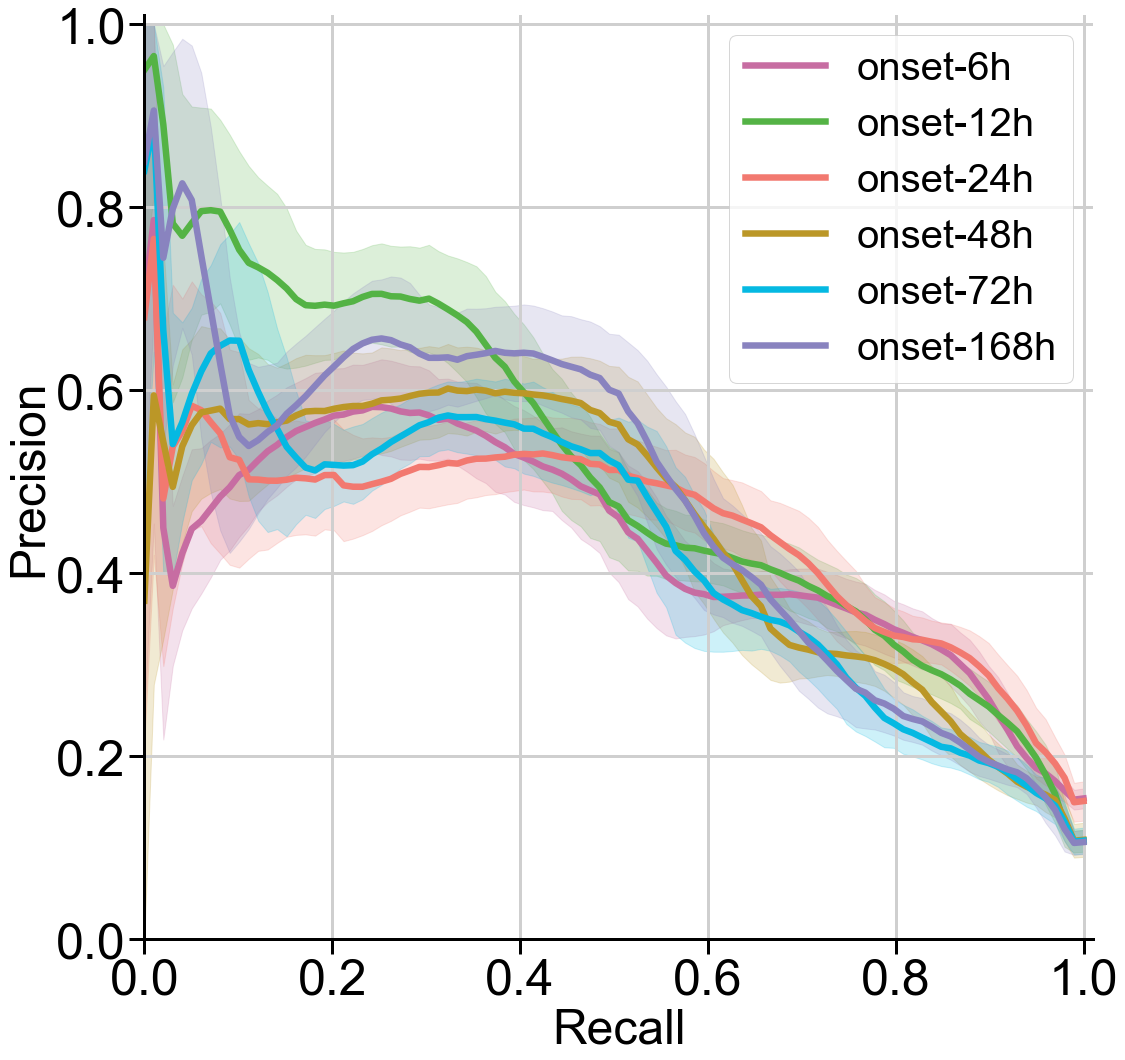

In [77]:
#PR_curve
pr_curve_onset6=pd.read_csv('G:/AKIprediction/non_SMOTE_result/onset6_result/pr_curveonset6_ourmodel.csv',encoding='gbk')
pr_curve_onset12=pd.read_csv('G:/AKIprediction/non_SMOTE_result/onset12_result/pr_curveonset12_ourmodel.csv',encoding='gbk')
pr_curve_onset24=pd.read_csv('G:/AKIprediction/non_SMOTE_result/onset24_result/pr_curveonset24_ourmodel.csv',encoding='gbk')
pr_curve_onset48=pd.read_csv('G:/AKIprediction/non_SMOTE_result/onset48_result/pr_curveonset48_ourmodel.csv',encoding='gbk')
pr_curve_onset72=pd.read_csv('G:/AKIprediction/non_SMOTE_result/onset72_result/pr_curveonset72_ourmodel.csv',encoding='gbk')
pr_curve_onset168=pd.read_csv('G:/AKIprediction/non_SMOTE_result/onset168_result/pr_curveonset168_ourmodel.csv',encoding='gbk')
fig, ax = plt.subplots(figsize = (17, 17))
plt.grid(color='#CFCFCF',lw=3)
plt.plot(pr_curve_onset6['mean_recall'], pr_curve_onset6['mean_precision'], label='onset-6h', color='#C76DA2',linewidth=6.5)
plt.plot(pr_curve_onset12['mean_recall'], pr_curve_onset12['mean_precision'], label='onset-12h', color='#54B345',linewidth=6.5)
plt.plot(pr_curve_onset24['mean_recall'], pr_curve_onset24['mean_precision'], label='onset-24h', color='#F27970',linewidth=6.5)
plt.plot(pr_curve_onset48['mean_recall'], pr_curve_onset48['mean_precision'], label='onset-48h', color='#BB9727',linewidth=6.5)
plt.plot(pr_curve_onset72['mean_recall'], pr_curve_onset72['mean_precision'], label='onset-72h', color='#05B9E2',linewidth=6.5)
plt.plot(pr_curve_onset168['mean_recall'], pr_curve_onset168['mean_precision'], label='onset-168h', color='#8983BF',linewidth=6.5)
plt.fill_between(pr_curve_onset6['mean_recall'],pr_curve_onset6['precision_lower'],pr_curve_onset6['precision_upper'],color="#C76DA2",alpha=0.2)
plt.fill_between(pr_curve_onset12['mean_recall'],pr_curve_onset12['precision_lower'],pr_curve_onset12['precision_upper'],color='#54B345',alpha=0.2)
plt.fill_between(pr_curve_onset24['mean_recall'],pr_curve_onset24['precision_lower'],pr_curve_onset24['precision_upper'],color="#F27970",alpha=0.2)
plt.fill_between(pr_curve_onset48['mean_recall'],pr_curve_onset48['precision_lower'],pr_curve_onset48['precision_upper'],color='#BB9727',alpha=0.2)
plt.fill_between(pr_curve_onset72['mean_recall'],pr_curve_onset72['precision_lower'],pr_curve_onset72['precision_upper'],color="#05B9E2",alpha=0.2)
plt.fill_between(pr_curve_onset168['mean_recall'],pr_curve_onset168['precision_lower'],pr_curve_onset168['precision_upper'],color='#8983BF',alpha=0.2)
font2 = {'family' : 'Arial',
'weight' : 'normal',
'size'   : 48,
}
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(True)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(True)    
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()
ax.spines['bottom'].set_linewidth(3)
ax.spines['left'].set_linewidth(3)
ax.axis([0,1.01,0,1.01])
plt.yticks(np.arange(0, 1.2, 0.2))
plt.xticks(np.arange(0, 1.2, 0.2))
plt.tick_params(labelsize=50)
plt.tick_params(which='major',width=3,length=15)
labels = ax.get_xticklabels() + ax.get_yticklabels()
[label.set_fontname('Arial') for label in labels]
plt.xlabel('Recall',font2)
plt.ylabel('Precision',font2)
plt.legend(loc="upper right",prop={'size':40,'family' : 'Arial','weight' : 'normal'})
plt.savefig('G:/AKIprediction/non_SMOTE_result/PR_curve_ourmodel_P1.tiff',bbox_inches = 'tight',dpi=300)

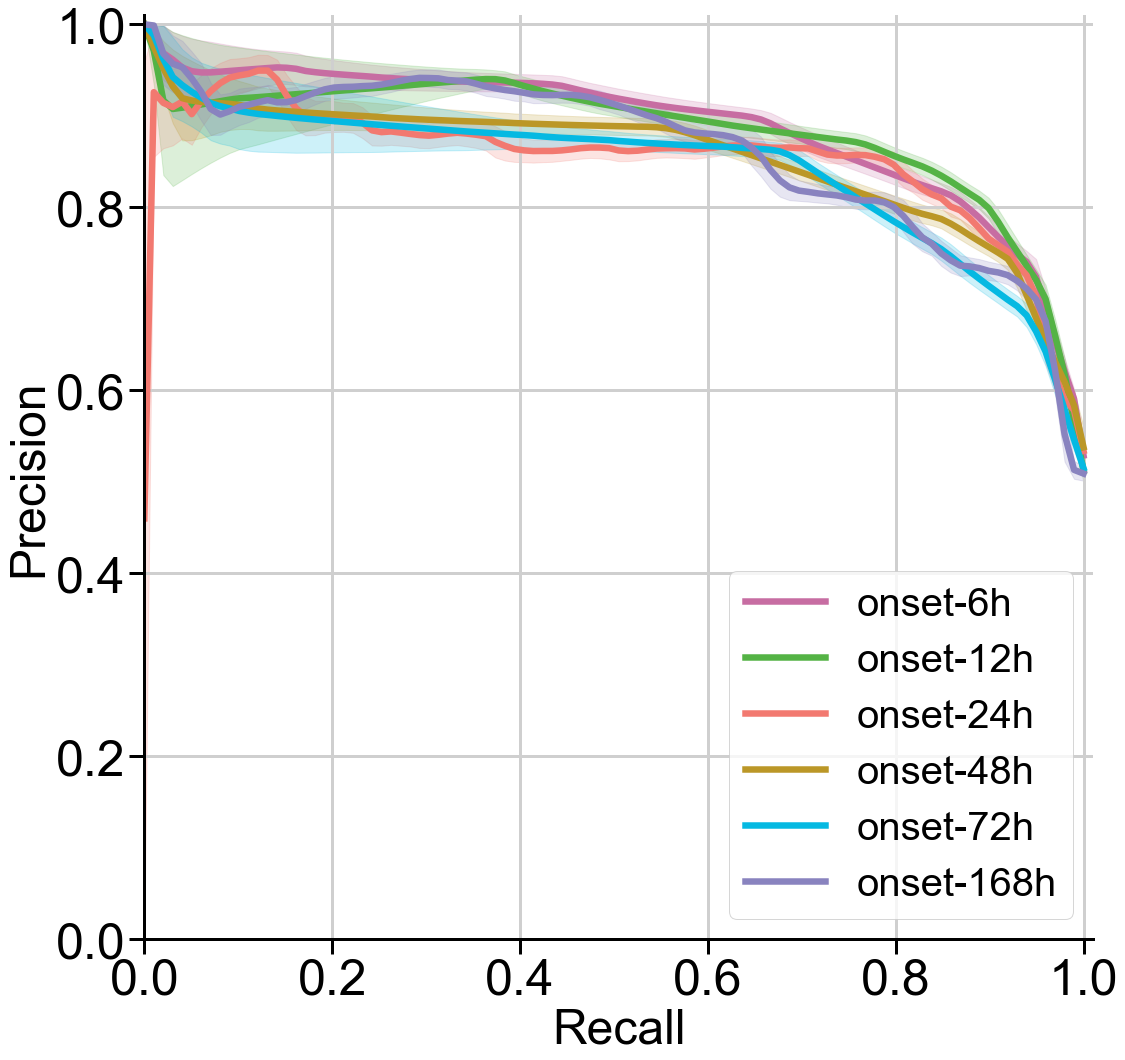

In [356]:
#PR_curve
pr_curve_onset6=pd.read_csv('G:/AKIprediction/SMOTE_result/onset6_result/pr_curveonset6_ourmodel.csv',encoding='gbk')
pr_curve_onset12=pd.read_csv('G:/AKIprediction/SMOTE_result/onset12_result/pr_curveonset12_ourmodel.csv',encoding='gbk')
pr_curve_onset24=pd.read_csv('G:/AKIprediction/SMOTE_result/onset24_result/pr_curveonset24_ourmodel.csv',encoding='gbk')
pr_curve_onset48=pd.read_csv('G:/AKIprediction/SMOTE_result/onset48_result/pr_curveonset48_ourmodel.csv',encoding='gbk')
pr_curve_onset72=pd.read_csv('G:/AKIprediction/SMOTE_result/onset72_result/pr_curveonset72_ourmodel.csv',encoding='gbk')
pr_curve_onset168=pd.read_csv('G:/AKIprediction/SMOTE_result/onset168_result/pr_curveonset168_ourmodel.csv',encoding='gbk')
fig, ax = plt.subplots(figsize = (17, 17))
plt.grid(color='#CFCFCF',lw=3)
plt.plot(pr_curve_onset6['mean_recall'], pr_curve_onset6['mean_precision'], label='onset-6h', color='#C76DA2',linewidth=6.5)
plt.plot(pr_curve_onset12['mean_recall'], pr_curve_onset12['mean_precision'], label='onset-12h', color='#54B345',linewidth=6.5)
plt.plot(pr_curve_onset24['mean_recall'], pr_curve_onset24['mean_precision'], label='onset-24h', color='#F27970',linewidth=6.5)
plt.plot(pr_curve_onset48['mean_recall'], pr_curve_onset48['mean_precision'], label='onset-48h', color='#BB9727',linewidth=6.5)
plt.plot(pr_curve_onset72['mean_recall'], pr_curve_onset72['mean_precision'], label='onset-72h', color='#05B9E2',linewidth=6.5)
plt.plot(pr_curve_onset168['mean_recall'], pr_curve_onset168['mean_precision'], label='onset-168h', color='#8983BF',linewidth=6.5)
plt.fill_between(pr_curve_onset6['mean_recall'],pr_curve_onset6['precision_lower'],pr_curve_onset6['precision_upper'],color="#C76DA2",alpha=0.2)
plt.fill_between(pr_curve_onset12['mean_recall'],pr_curve_onset12['precision_lower'],pr_curve_onset12['precision_upper'],color='#54B345',alpha=0.2)
plt.fill_between(pr_curve_onset24['mean_recall'],pr_curve_onset24['precision_lower'],pr_curve_onset24['precision_upper'],color="#F27970",alpha=0.2)
plt.fill_between(pr_curve_onset48['mean_recall'],pr_curve_onset48['precision_lower'],pr_curve_onset48['precision_upper'],color='#BB9727',alpha=0.2)
plt.fill_between(pr_curve_onset72['mean_recall'],pr_curve_onset72['precision_lower'],pr_curve_onset72['precision_upper'],color="#05B9E2",alpha=0.2)
plt.fill_between(pr_curve_onset168['mean_recall'],pr_curve_onset168['precision_lower'],pr_curve_onset168['precision_upper'],color='#8983BF',alpha=0.2)
font2 = {'family' : 'Arial',
'weight' : 'normal',
'size'   : 48,
}
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(True)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(True)    
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()
ax.spines['bottom'].set_linewidth(3)
ax.spines['left'].set_linewidth(3)
ax.axis([0,1.01,0,1.01])
plt.yticks(np.arange(0, 1.2, 0.2))
plt.xticks(np.arange(0, 1.2, 0.2))
plt.tick_params(labelsize=50)
plt.tick_params(which='major',width=3,length=15)
labels = ax.get_xticklabels() + ax.get_yticklabels()
[label.set_fontname('Arial') for label in labels]
plt.xlabel('Recall',font2)
plt.ylabel('Precision',font2)
plt.legend(loc="lower right",prop={'size':40,'family' : 'Arial','weight' : 'normal'})
plt.savefig('G:/AKIprediction/SMOTE_result/PR_curve_ourmodel_P1.tiff',bbox_inches = 'tight',dpi=300)

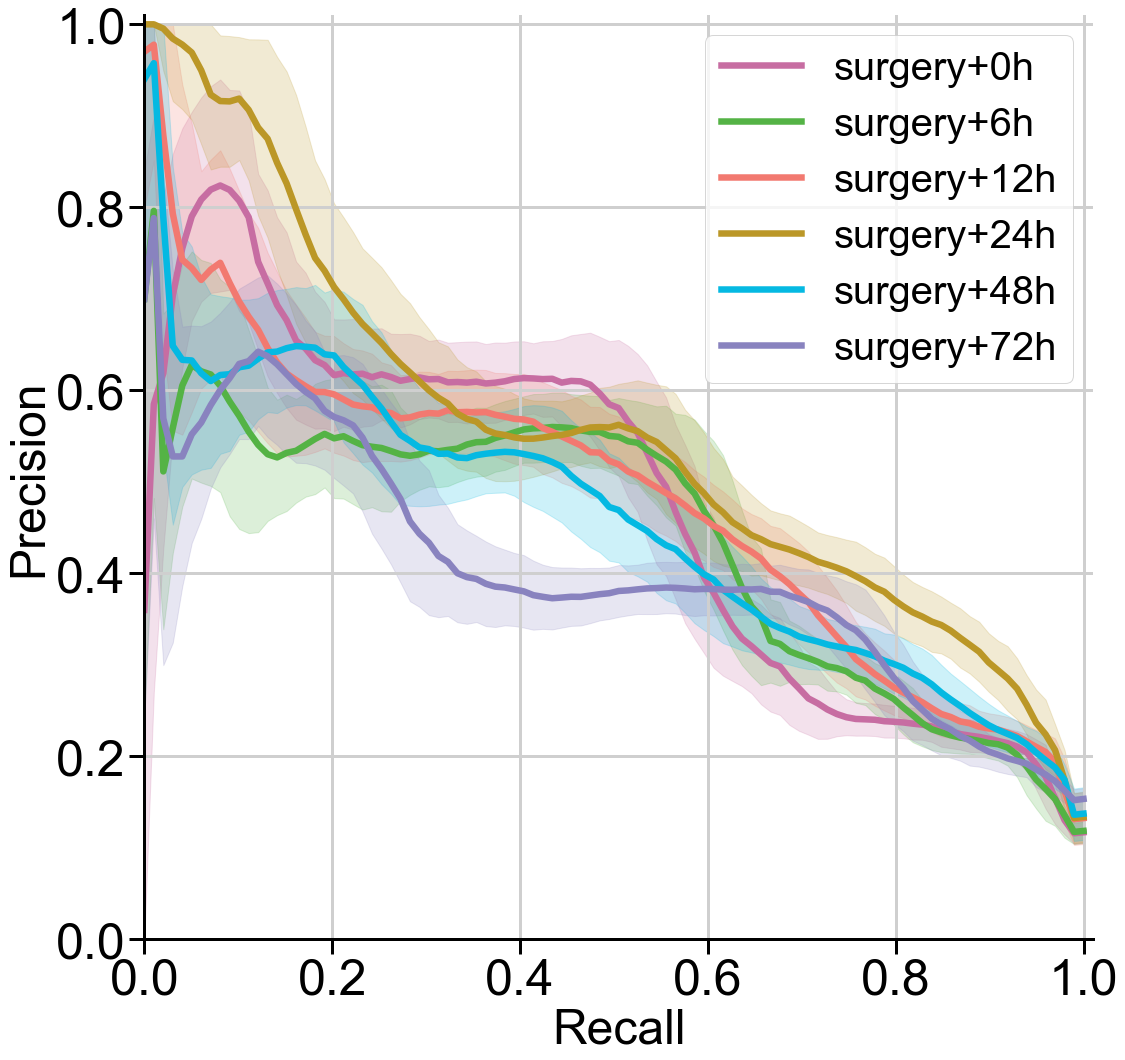

In [80]:
#PR_curve
pr_curve_onset6=pd.read_csv('G:/AKIprediction/non_SMOTE_result/surgery0_result/pr_curvesurgery0_ourmodel.csv',encoding='gbk')
pr_curve_onset12=pd.read_csv('G:/AKIprediction/non_SMOTE_result/surgery6_result/pr_curvesurgery6_ourmodel.csv',encoding='gbk')
pr_curve_onset24=pd.read_csv('G:/AKIprediction/non_SMOTE_result/surgery12_result/pr_curvesurgery12_ourmodel.csv',encoding='gbk')
pr_curve_onset48=pd.read_csv('G:/AKIprediction/non_SMOTE_result/surgery24_result/pr_curvesurgery24_ourmodel.csv',encoding='gbk')
pr_curve_onset72=pd.read_csv('G:/AKIprediction/non_SMOTE_result/surgery48_result/pr_curvesurgery48_ourmodel.csv',encoding='gbk')
pr_curve_onset168=pd.read_csv('G:/AKIprediction/non_SMOTE_result/surgery72_result/pr_curvesurgery72_ourmodel.csv',encoding='gbk')
fig, ax = plt.subplots(figsize = (17, 17))
plt.grid(color='#CFCFCF',lw=3)
plt.plot(pr_curve_onset6['mean_recall'], pr_curve_onset6['mean_precision'], label='surgery+0h', color='#C76DA2',linewidth=6.5)
plt.plot(pr_curve_onset12['mean_recall'], pr_curve_onset12['mean_precision'], label='surgery+6h', color='#54B345',linewidth=6.5)
plt.plot(pr_curve_onset24['mean_recall'], pr_curve_onset24['mean_precision'], label='surgery+12h', color='#F27970',linewidth=6.5)
plt.plot(pr_curve_onset48['mean_recall'], pr_curve_onset48['mean_precision'], label='surgery+24h', color='#BB9727',linewidth=6.5)
plt.plot(pr_curve_onset72['mean_recall'], pr_curve_onset72['mean_precision'], label='surgery+48h', color='#05B9E2',linewidth=6.5)
plt.plot(pr_curve_onset168['mean_recall'], pr_curve_onset168['mean_precision'], label='surgery+72h', color='#8983BF',linewidth=6.5)
plt.fill_between(pr_curve_onset6['mean_recall'],pr_curve_onset6['precision_lower'],pr_curve_onset6['precision_upper'],color="#C76DA2",alpha=0.2)
plt.fill_between(pr_curve_onset12['mean_recall'],pr_curve_onset12['precision_lower'],pr_curve_onset12['precision_upper'],color='#54B345',alpha=0.2)
plt.fill_between(pr_curve_onset24['mean_recall'],pr_curve_onset24['precision_lower'],pr_curve_onset24['precision_upper'],color="#F27970",alpha=0.2)
plt.fill_between(pr_curve_onset48['mean_recall'],pr_curve_onset48['precision_lower'],pr_curve_onset48['precision_upper'],color='#BB9727',alpha=0.2)
plt.fill_between(pr_curve_onset72['mean_recall'],pr_curve_onset72['precision_lower'],pr_curve_onset72['precision_upper'],color="#05B9E2",alpha=0.2)
plt.fill_between(pr_curve_onset168['mean_recall'],pr_curve_onset168['precision_lower'],pr_curve_onset168['precision_upper'],color='#8983BF',alpha=0.2)
font2 = {'family' : 'Arial',
'weight' : 'normal',
'size'   : 48,
}
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(True)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(True)    
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()
ax.spines['bottom'].set_linewidth(3)
ax.spines['left'].set_linewidth(3)
ax.axis([0,1.01,0,1.01])
plt.yticks(np.arange(0, 1.2, 0.2))
plt.xticks(np.arange(0, 1.2, 0.2))
plt.tick_params(labelsize=50)
plt.tick_params(which='major',width=3,length=15)
labels = ax.get_xticklabels() + ax.get_yticklabels()
[label.set_fontname('Arial') for label in labels]
plt.xlabel('Recall',font2)
plt.ylabel('Precision',font2)
plt.legend(loc="upper right",prop={'size':40,'family' : 'Arial','weight' : 'normal'})
plt.savefig('G:/AKIprediction/non_SMOTE_result/PR_curve_ourmodel_P2.tiff',bbox_inches = 'tight',dpi=300)

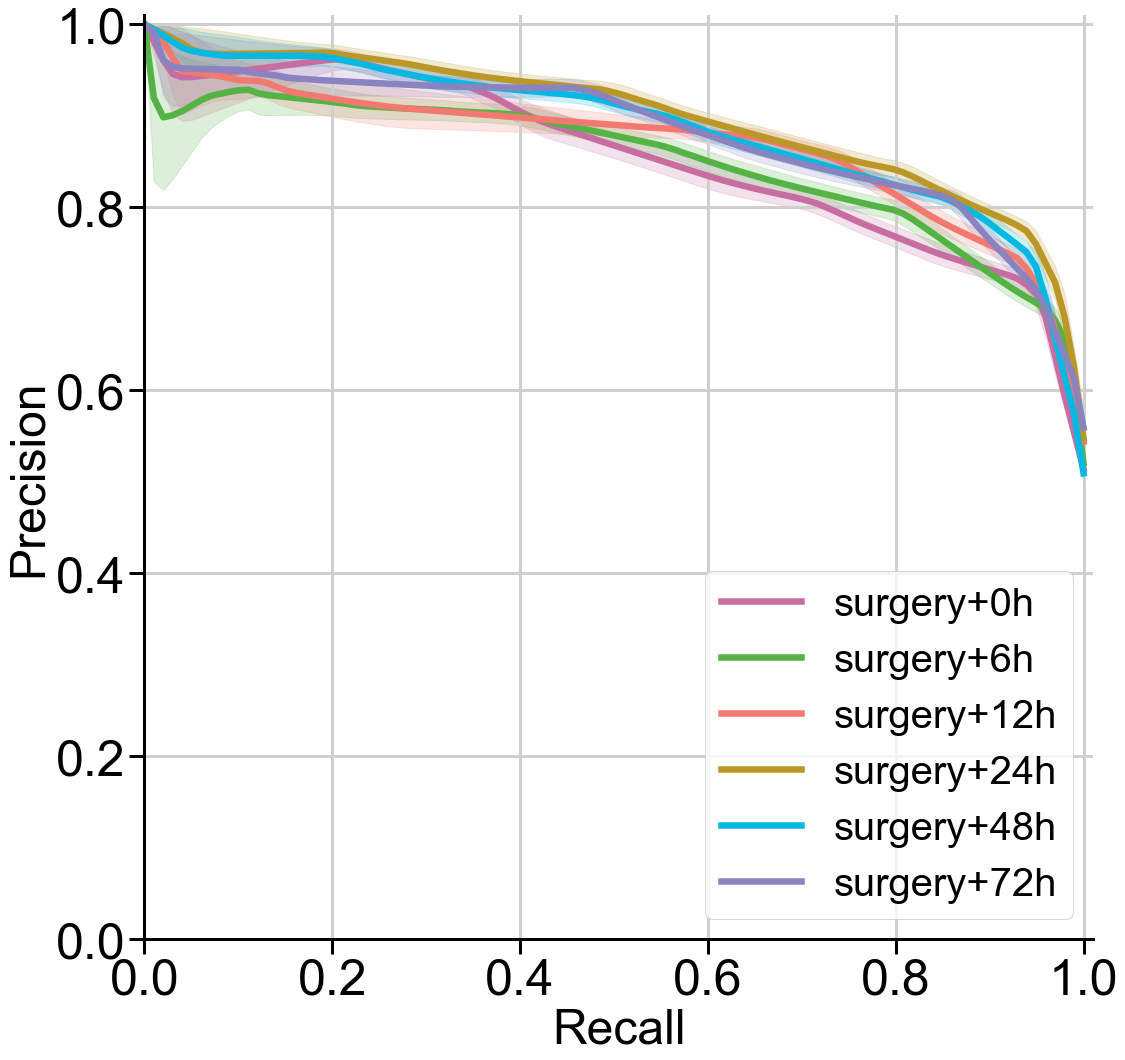

In [351]:
#PR_curve
pr_curve_onset6=pd.read_csv('G:/AKIprediction/SMOTE_result/surgery0_result/pr_curvesurgery0_ourmodel.csv',encoding='gbk')
pr_curve_onset12=pd.read_csv('G:/AKIprediction/SMOTE_result/surgery6_result/pr_curvesurgery6_ourmodel.csv',encoding='gbk')
pr_curve_onset24=pd.read_csv('G:/AKIprediction/SMOTE_result/surgery12_result/pr_curvesurgery12_ourmodel.csv',encoding='gbk')
pr_curve_onset48=pd.read_csv('G:/AKIprediction/SMOTE_result/surgery24_result/pr_curvesurgery24_ourmodel.csv',encoding='gbk')
pr_curve_onset72=pd.read_csv('G:/AKIprediction/SMOTE_result/surgery48_result/pr_curvesurgery48_ourmodel.csv',encoding='gbk')
pr_curve_onset168=pd.read_csv('G:/AKIprediction/SMOTE_result/surgery72_result/pr_curvesurgery72_ourmodel.csv',encoding='gbk')
fig, ax = plt.subplots(figsize = (17, 17))
plt.grid(color='#CFCFCF',lw=3)
plt.plot(pr_curve_onset6['mean_recall'], pr_curve_onset6['mean_precision'], label='surgery+0h', color='#C76DA2',linewidth=6.5)
plt.plot(pr_curve_onset12['mean_recall'], pr_curve_onset12['mean_precision'], label='surgery+6h', color='#54B345',linewidth=6.5)
plt.plot(pr_curve_onset24['mean_recall'], pr_curve_onset24['mean_precision'], label='surgery+12h', color='#F27970',linewidth=6.5)
plt.plot(pr_curve_onset48['mean_recall'], pr_curve_onset48['mean_precision'], label='surgery+24h', color='#BB9727',linewidth=6.5)
plt.plot(pr_curve_onset72['mean_recall'], pr_curve_onset72['mean_precision'], label='surgery+48h', color='#05B9E2',linewidth=6.5)
plt.plot(pr_curve_onset168['mean_recall'], pr_curve_onset168['mean_precision'], label='surgery+72h', color='#8983BF',linewidth=6.5)
plt.fill_between(pr_curve_onset6['mean_recall'],pr_curve_onset6['precision_lower'],pr_curve_onset6['precision_upper'],color="#C76DA2",alpha=0.2)
plt.fill_between(pr_curve_onset12['mean_recall'],pr_curve_onset12['precision_lower'],pr_curve_onset12['precision_upper'],color='#54B345',alpha=0.2)
plt.fill_between(pr_curve_onset24['mean_recall'],pr_curve_onset24['precision_lower'],pr_curve_onset24['precision_upper'],color="#F27970",alpha=0.2)
plt.fill_between(pr_curve_onset48['mean_recall'],pr_curve_onset48['precision_lower'],pr_curve_onset48['precision_upper'],color='#BB9727',alpha=0.2)
plt.fill_between(pr_curve_onset72['mean_recall'],pr_curve_onset72['precision_lower'],pr_curve_onset72['precision_upper'],color="#05B9E2",alpha=0.2)
plt.fill_between(pr_curve_onset168['mean_recall'],pr_curve_onset168['precision_lower'],pr_curve_onset168['precision_upper'],color='#8983BF',alpha=0.2)
font2 = {'family' : 'Arial',
'weight' : 'normal',
'size'   : 48,
}
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(True)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(True)    
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()
ax.spines['bottom'].set_linewidth(3)
ax.spines['left'].set_linewidth(3)
ax.axis([0,1.01,0,1.01])
plt.yticks(np.arange(0, 1.2, 0.2))
plt.xticks(np.arange(0, 1.2, 0.2))
plt.tick_params(labelsize=50)
plt.tick_params(which='major',width=3,length=15)
labels = ax.get_xticklabels() + ax.get_yticklabels()
[label.set_fontname('Arial') for label in labels]
plt.xlabel('Recall',font2)
plt.ylabel('Precision',font2)
plt.legend(loc="lower right",prop={'size':40,'family' : 'Arial','weight' : 'normal'})
plt.savefig('G:/AKIprediction/SMOTE_result/PR_curve_ourmodel_P2.tiff',bbox_inches = 'tight',dpi=300)

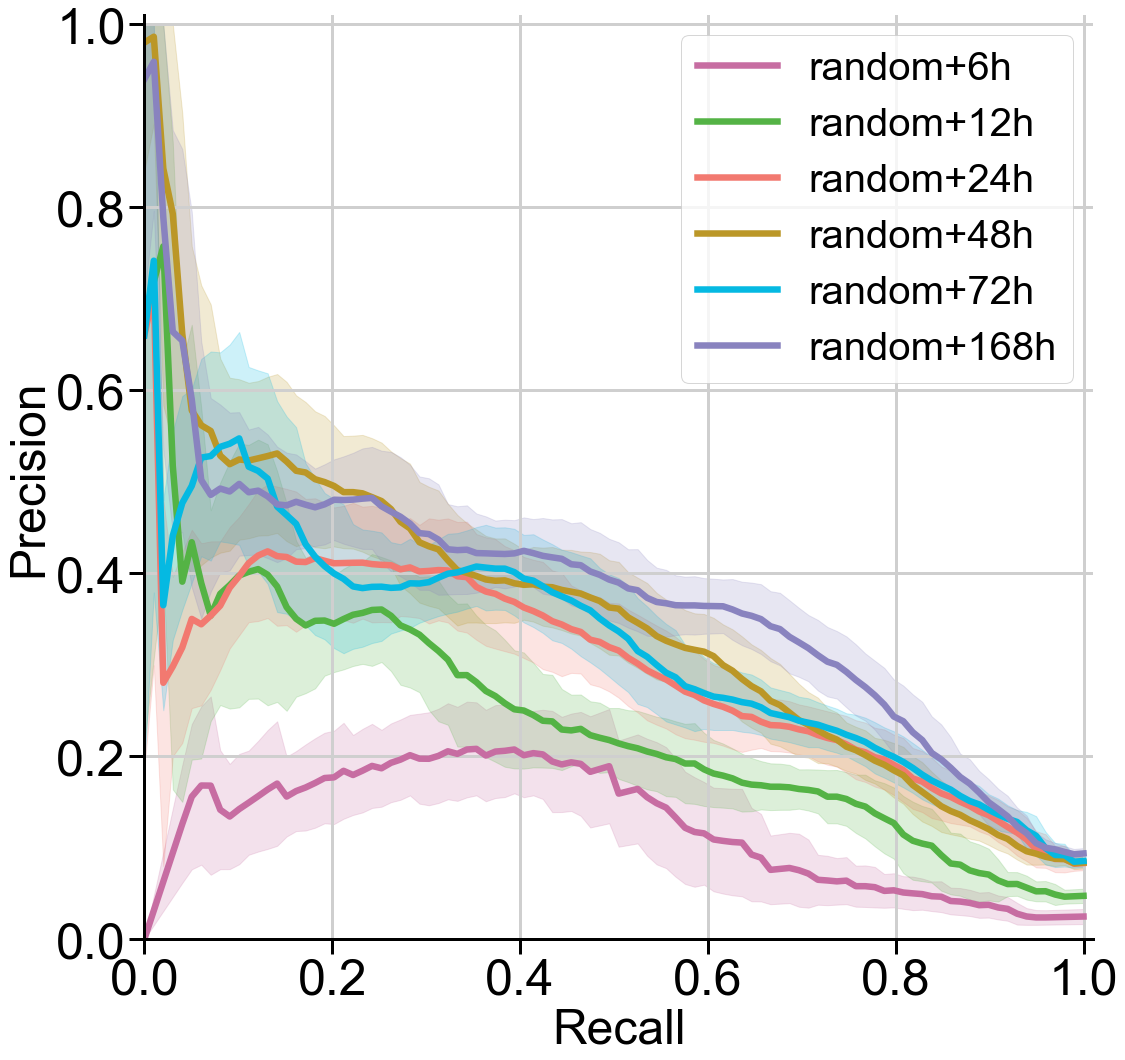

In [345]:
#PR_curve
pr_curve_onset6=pd.read_csv('G:/AKIprediction/non_SMOTE_result/random6_result/pr_curverandom6_ourmodel.csv',encoding='gbk')
pr_curve_onset12=pd.read_csv('G:/AKIprediction/non_SMOTE_result/random12_result/pr_curverandom12_ourmodel.csv',encoding='gbk')
pr_curve_onset24=pd.read_csv('G:/AKIprediction/non_SMOTE_result/random24_result/pr_curverandom24_ourmodel.csv',encoding='gbk')
pr_curve_onset48=pd.read_csv('G:/AKIprediction/non_SMOTE_result/random48_result/pr_curverandom48_ourmodel.csv',encoding='gbk')
pr_curve_onset72=pd.read_csv('G:/AKIprediction/non_SMOTE_result/random72_result/pr_curverandom72_ourmodel.csv',encoding='gbk')
pr_curve_onset168=pd.read_csv('G:/AKIprediction/non_SMOTE_result/random168_result/pr_curverandom168_ourmodel.csv',encoding='gbk')
fig, ax = plt.subplots(figsize = (17, 17))
plt.grid(color='#CFCFCF',lw=3)
plt.plot(pr_curve_onset6['mean_recall'], pr_curve_onset6['mean_precision'], label='random+6h', color='#C76DA2',linewidth=6.5)
plt.plot(pr_curve_onset12['mean_recall'], pr_curve_onset12['mean_precision'], label='random+12h', color='#54B345',linewidth=6.5)
plt.plot(pr_curve_onset24['mean_recall'], pr_curve_onset24['mean_precision'], label='random+24h', color='#F27970',linewidth=6.5)
plt.plot(pr_curve_onset48['mean_recall'], pr_curve_onset48['mean_precision'], label='random+48h', color='#BB9727',linewidth=6.5)
plt.plot(pr_curve_onset72['mean_recall'], pr_curve_onset72['mean_precision'], label='random+72h', color='#05B9E2',linewidth=6.5)
plt.plot(pr_curve_onset168['mean_recall'], pr_curve_onset168['mean_precision'], label='random+168h', color='#8983BF',linewidth=6.5)
plt.fill_between(pr_curve_onset6['mean_recall'],pr_curve_onset6['precision_lower'],pr_curve_onset6['precision_upper'],color="#C76DA2",alpha=0.2)
plt.fill_between(pr_curve_onset12['mean_recall'],pr_curve_onset12['precision_lower'],pr_curve_onset12['precision_upper'],color='#54B345',alpha=0.2)
plt.fill_between(pr_curve_onset24['mean_recall'],pr_curve_onset24['precision_lower'],pr_curve_onset24['precision_upper'],color="#F27970",alpha=0.2)
plt.fill_between(pr_curve_onset48['mean_recall'],pr_curve_onset48['precision_lower'],pr_curve_onset48['precision_upper'],color='#BB9727',alpha=0.2)
plt.fill_between(pr_curve_onset72['mean_recall'],pr_curve_onset72['precision_lower'],pr_curve_onset72['precision_upper'],color="#05B9E2",alpha=0.2)
plt.fill_between(pr_curve_onset168['mean_recall'],pr_curve_onset168['precision_lower'],pr_curve_onset168['precision_upper'],color='#8983BF',alpha=0.2)
font2 = {'family' : 'Arial',
'weight' : 'normal',
'size'   : 48,
}
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(True)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(True)    
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()
ax.spines['bottom'].set_linewidth(3)
ax.spines['left'].set_linewidth(3)
ax.axis([0,1.01,0,1.01])
plt.yticks(np.arange(0, 1.2, 0.2))
plt.xticks(np.arange(0, 1.2, 0.2))
plt.tick_params(labelsize=50)
plt.tick_params(which='major',width=3,length=15)
labels = ax.get_xticklabels() + ax.get_yticklabels()
[label.set_fontname('Arial') for label in labels]
plt.xlabel('Recall',font2)
plt.ylabel('Precision',font2)
plt.legend(loc="upper right",prop={'size':40,'family' : 'Arial','weight' : 'normal'})
plt.savefig('G:/AKIprediction/non_SMOTE_result/PR_curve_ourmodel_P3.tiff',bbox_inches = 'tight',dpi=300)

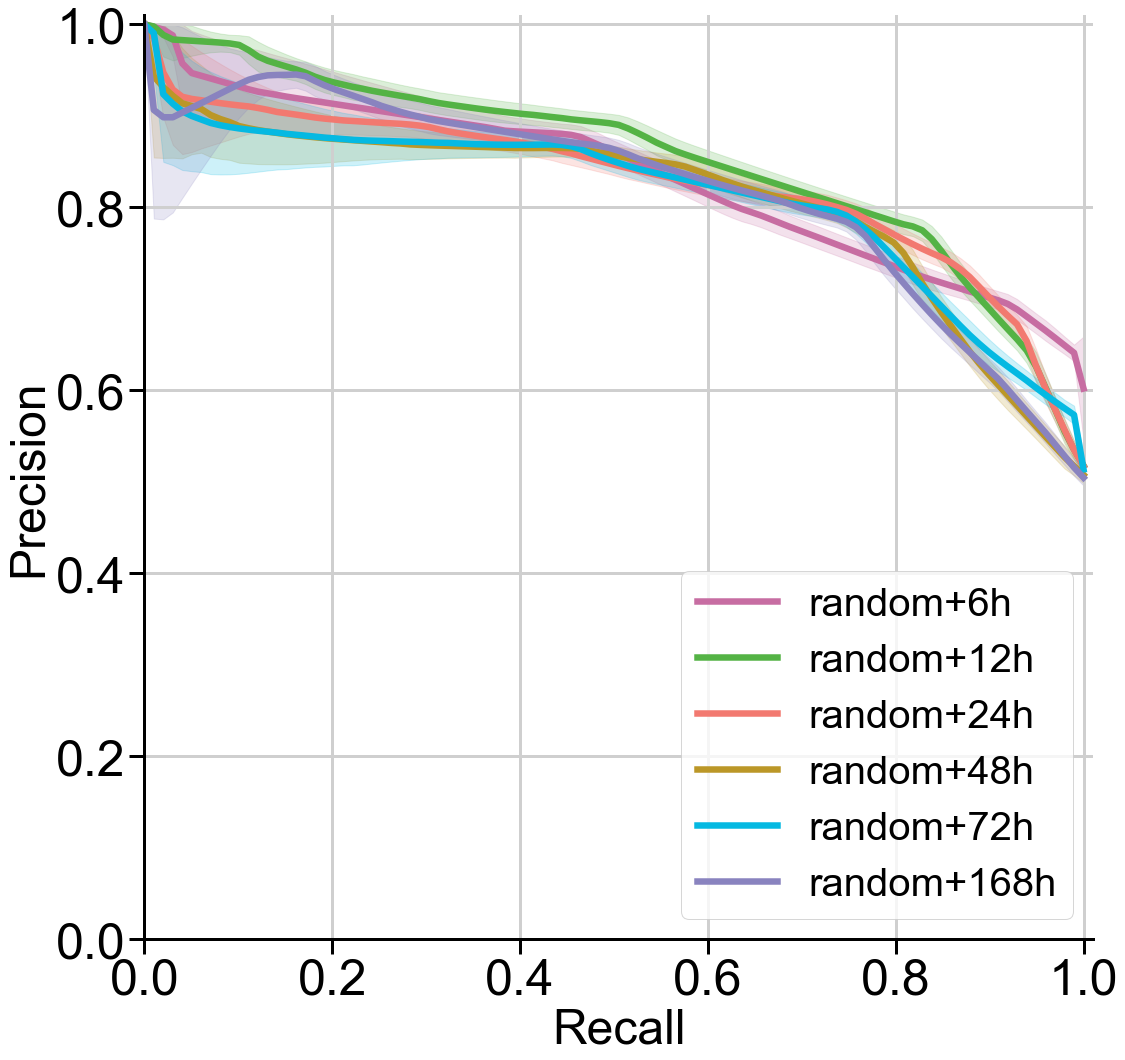

In [352]:
#PR_curve
pr_curve_onset6=pd.read_csv('G:/AKIprediction/SMOTE_result/random6_result/pr_curverandom6_ourmodel.csv',encoding='gbk')
pr_curve_onset12=pd.read_csv('G:/AKIprediction/SMOTE_result/random12_result/pr_curverandom12_ourmodel.csv',encoding='gbk')
pr_curve_onset24=pd.read_csv('G:/AKIprediction/SMOTE_result/random24_result/pr_curverandom24_ourmodel.csv',encoding='gbk')
pr_curve_onset48=pd.read_csv('G:/AKIprediction/SMOTE_result/random48_result/pr_curverandom48_ourmodel.csv',encoding='gbk')
pr_curve_onset72=pd.read_csv('G:/AKIprediction/SMOTE_result/random72_result/pr_curverandom72_ourmodel.csv',encoding='gbk')
pr_curve_onset168=pd.read_csv('G:/AKIprediction/SMOTE_result/random168_result/pr_curverandom168_ourmodel.csv',encoding='gbk')
fig, ax = plt.subplots(figsize = (17, 17))
plt.grid(color='#CFCFCF',lw=3)
plt.plot(pr_curve_onset6['mean_recall'], pr_curve_onset6['mean_precision'], label='random+6h', color='#C76DA2',linewidth=6.5)
plt.plot(pr_curve_onset12['mean_recall'], pr_curve_onset12['mean_precision'], label='random+12h', color='#54B345',linewidth=6.5)
plt.plot(pr_curve_onset24['mean_recall'], pr_curve_onset24['mean_precision'], label='random+24h', color='#F27970',linewidth=6.5)
plt.plot(pr_curve_onset48['mean_recall'], pr_curve_onset48['mean_precision'], label='random+48h', color='#BB9727',linewidth=6.5)
plt.plot(pr_curve_onset72['mean_recall'], pr_curve_onset72['mean_precision'], label='random+72h', color='#05B9E2',linewidth=6.5)
plt.plot(pr_curve_onset168['mean_recall'], pr_curve_onset168['mean_precision'], label='random+168h', color='#8983BF',linewidth=6.5)
plt.fill_between(pr_curve_onset6['mean_recall'],pr_curve_onset6['precision_lower'],pr_curve_onset6['precision_upper'],color="#C76DA2",alpha=0.2)
plt.fill_between(pr_curve_onset12['mean_recall'],pr_curve_onset12['precision_lower'],pr_curve_onset12['precision_upper'],color='#54B345',alpha=0.2)
plt.fill_between(pr_curve_onset24['mean_recall'],pr_curve_onset24['precision_lower'],pr_curve_onset24['precision_upper'],color="#F27970",alpha=0.2)
plt.fill_between(pr_curve_onset48['mean_recall'],pr_curve_onset48['precision_lower'],pr_curve_onset48['precision_upper'],color='#BB9727',alpha=0.2)
plt.fill_between(pr_curve_onset72['mean_recall'],pr_curve_onset72['precision_lower'],pr_curve_onset72['precision_upper'],color="#05B9E2",alpha=0.2)
plt.fill_between(pr_curve_onset168['mean_recall'],pr_curve_onset168['precision_lower'],pr_curve_onset168['precision_upper'],color='#8983BF',alpha=0.2)
font2 = {'family' : 'Arial',
'weight' : 'normal',
'size'   : 48,
}
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(True)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(True)    
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()
ax.spines['bottom'].set_linewidth(3)
ax.spines['left'].set_linewidth(3)
ax.axis([0,1.01,0,1.01])
plt.yticks(np.arange(0, 1.2, 0.2))
plt.xticks(np.arange(0, 1.2, 0.2))
plt.tick_params(labelsize=50)
plt.tick_params(which='major',width=3,length=15)
labels = ax.get_xticklabels() + ax.get_yticklabels()
[label.set_fontname('Arial') for label in labels]
plt.xlabel('Recall',font2)
plt.ylabel('Precision',font2)
plt.legend(loc="lower right",prop={'size':40,'family' : 'Arial','weight' : 'normal'})
plt.savefig('G:/AKIprediction/SMOTE_result/PR_curve_ourmodel_P3.tiff',bbox_inches = 'tight',dpi=300)

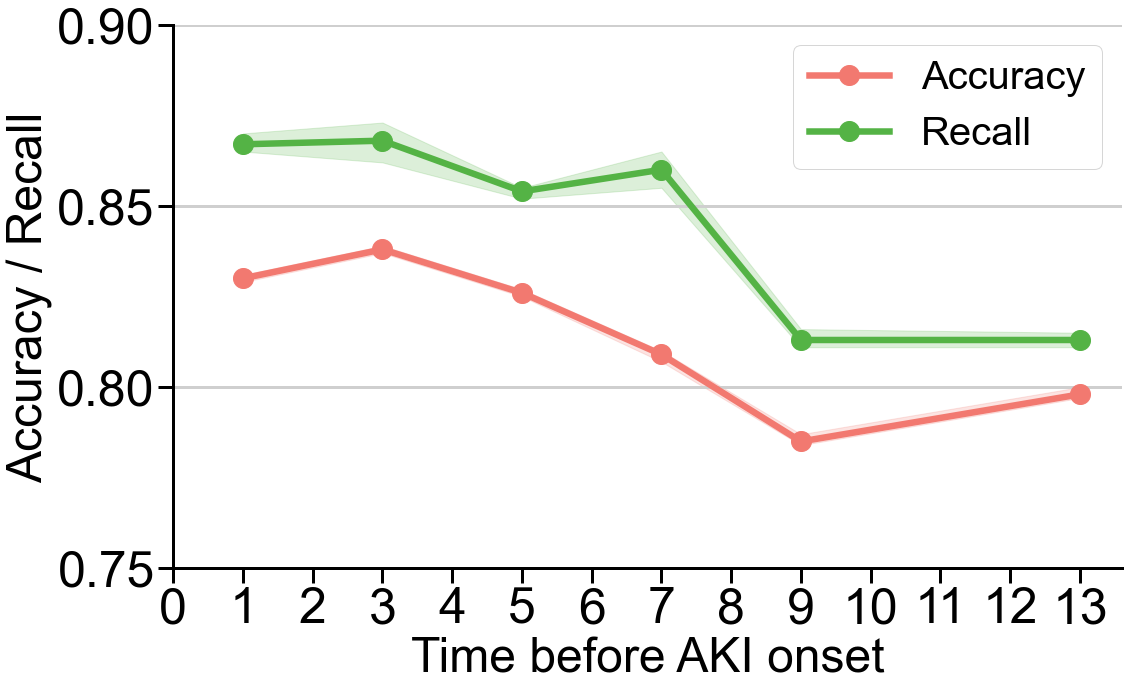

In [84]:
#accuracy curve
import matplotlib.pyplot as plt
perspective1_data=pd.read_excel('G:/AKIprediction/Maintext/Maintext/Figure2_data.xlsx',sheet_name=0)
fig,ax = plt.subplots(figsize = (17, 10))
plt.grid(color='#CFCFCF',lw=3,axis="y")
ax.plot(perspective1_data['xaxis'], perspective1_data['accuracy'], label='Accuracy', color='#F27970',linewidth=6.5,marker='o',
        markersize=20)
ax.fill_between(perspective1_data['xaxis'],perspective1_data['accuracy_lower'],perspective1_data['accuracy_upper'],color="#F27970",alpha=0.2)
ax.plot(perspective1_data['xaxis'], perspective1_data['recall'], label='Recall', color='#54B345',linewidth=6.5,marker='o',
        markersize=20)
ax.fill_between(perspective1_data['xaxis'],perspective1_data['recall_lower'],perspective1_data['recall_upper'],color="#54B345",alpha=0.2)
font2 = {'family' : 'Arial',
'weight' : 'normal',
'size'   : 48,
}
plt.yticks(np.arange(0.75,0.91, 0.05))
plt.xticks(np.arange(0, 14, 1))
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(True)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(True)
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()
ax.spines['bottom'].set_linewidth(3)
ax.spines['left'].set_linewidth(3)
ax.tick_params(labelsize=50)
ax.tick_params(which='major',width=3,length=15)
labels = ax.get_xticklabels() + ax.get_yticklabels()
[label.set_fontname('Arial') for label in labels]
plt.xlabel('Time before AKI onset',font2)
plt.ylabel('Accuracy / Recall',font2)
plt.legend(loc="upper right",prop={'size':40,'family' : 'Arial','weight' : 'normal'})
plt.savefig('G:/AKIprediction/SMOTE_result/recall_accuracy_ourmodel_P1.tiff',bbox_inches = 'tight',dpi=300)

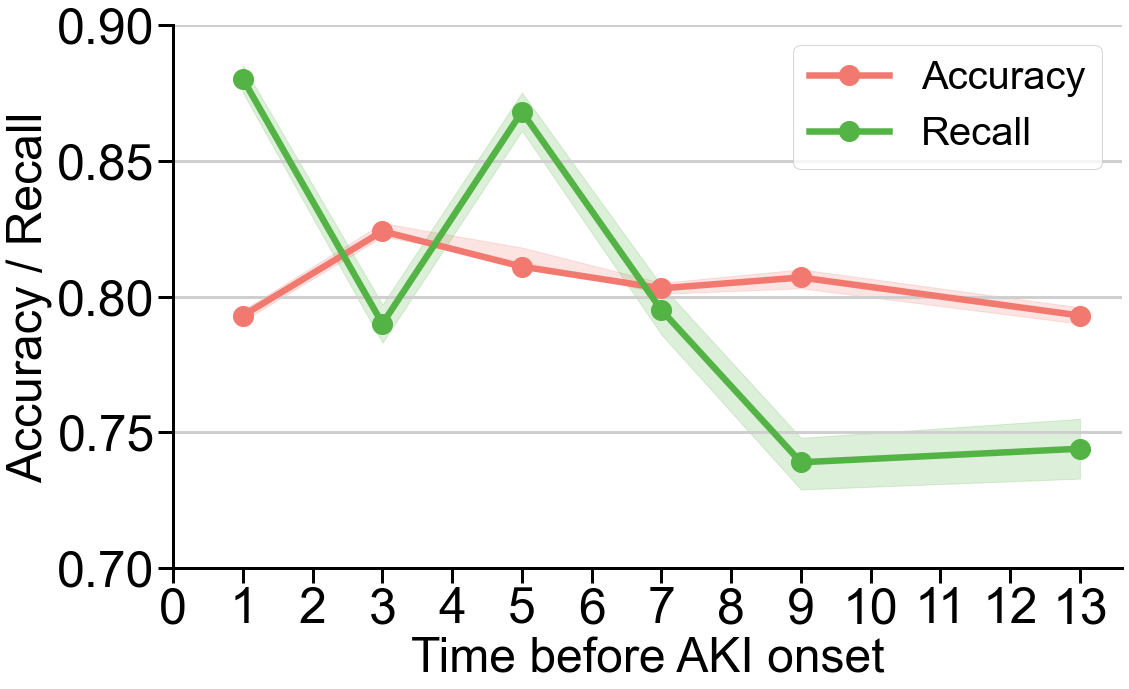

In [85]:
#accuracy curve
import matplotlib.pyplot as plt
perspective1_data=pd.read_excel('G:/AKIprediction/Maintext/Maintext/Figure3_data.xlsx',sheet_name=0)
fig,ax = plt.subplots(figsize = (17, 10))
plt.grid(color='#CFCFCF',lw=3,axis="y")
ax.plot(perspective1_data['xaxis'], perspective1_data['accuracy'], label='Accuracy', color='#F27970',linewidth=6.5,marker='o',
        markersize=20)
ax.fill_between(perspective1_data['xaxis'],perspective1_data['accuracy_lower'],perspective1_data['accuracy_upper'],color="#F27970",alpha=0.2)
ax.plot(perspective1_data['xaxis'], perspective1_data['recall'], label='Recall', color='#54B345',linewidth=6.5,marker='o',
        markersize=20)
ax.fill_between(perspective1_data['xaxis'],perspective1_data['recall_lower'],perspective1_data['recall_upper'],color="#54B345",alpha=0.2)
font2 = {'family' : 'Arial',
'weight' : 'normal',
'size'   : 48,
}
plt.yticks(np.arange(0.7,0.91, 0.05))
plt.xticks(np.arange(0, 14, 1))
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(True)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(True)
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()
ax.spines['bottom'].set_linewidth(3)
ax.spines['left'].set_linewidth(3)
ax.tick_params(labelsize=50)
ax.tick_params(which='major',width=3,length=15)
labels = ax.get_xticklabels() + ax.get_yticklabels()
[label.set_fontname('Arial') for label in labels]
plt.xlabel('Time before AKI onset',font2)
plt.ylabel('Accuracy / Recall',font2)
plt.legend(loc="upper right",prop={'size':40,'family' : 'Arial','weight' : 'normal'})
plt.savefig('G:/AKIprediction/non_SMOTE_result/recall_accuracy_ourmodel_P1.tiff',bbox_inches = 'tight',dpi=300)

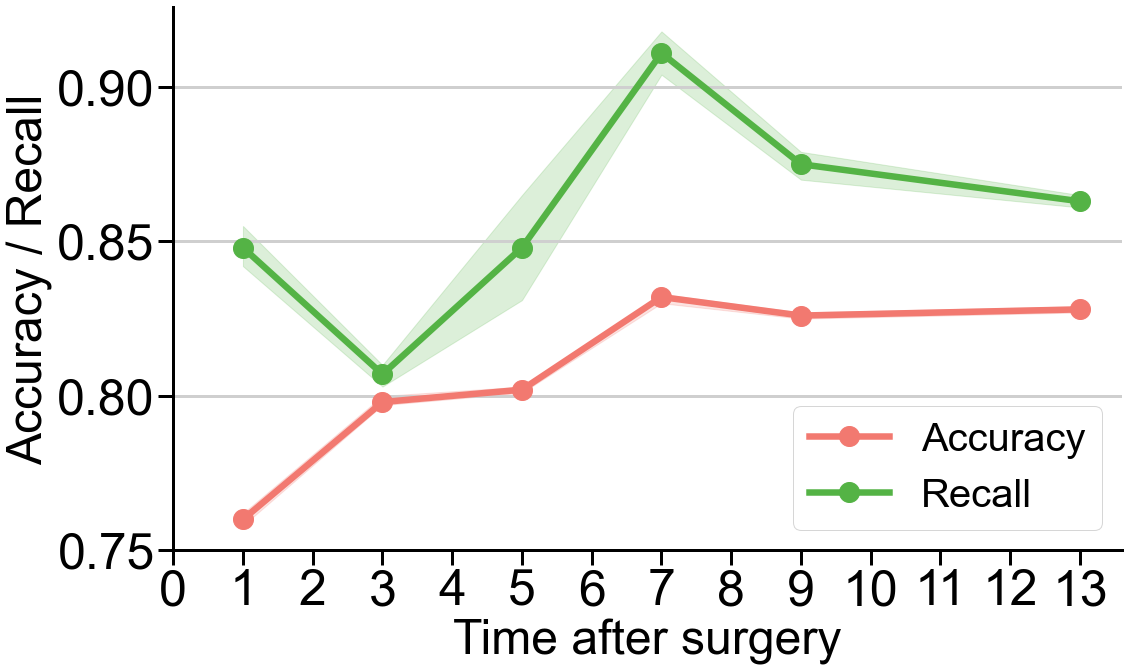

In [86]:
#accuracy curve
import matplotlib.pyplot as plt
perspective1_data=pd.read_excel('G:/AKIprediction/Maintext/Maintext/Figure2_data.xlsx',sheet_name=1)
fig,ax = plt.subplots(figsize = (17, 10))
plt.grid(color='#CFCFCF',lw=3,axis="y")
ax.plot(perspective1_data['xaxis'], perspective1_data['accuracy'], label='Accuracy', color='#F27970',linewidth=6.5,marker='o',
        markersize=20)
ax.fill_between(perspective1_data['xaxis'],perspective1_data['accuracy_lower'],perspective1_data['accuracy_upper'],color="#F27970",alpha=0.2)
ax.plot(perspective1_data['xaxis'], perspective1_data['recall'], label='Recall', color='#54B345',linewidth=6.5,marker='o',
        markersize=20)
ax.fill_between(perspective1_data['xaxis'],perspective1_data['recall_lower'],perspective1_data['recall_upper'],color="#54B345",alpha=0.2)
font2 = {'family' : 'Arial',
'weight' : 'normal',
'size'   : 48,
}
plt.yticks(np.arange(0.75,0.94, 0.05))
plt.xticks(np.arange(0, 14, 1))
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(True)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(True)
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()
ax.spines['bottom'].set_linewidth(3)
ax.spines['left'].set_linewidth(3)
ax.tick_params(labelsize=50)
ax.tick_params(which='major',width=3,length=15)
labels = ax.get_xticklabels() + ax.get_yticklabels()
[label.set_fontname('Arial') for label in labels]
plt.xlabel('Time after surgery',font2)
plt.ylabel('Accuracy / Recall',font2)
plt.legend(loc="lower right",prop={'size':40,'family' : 'Arial','weight' : 'normal'})
plt.savefig('G:/AKIprediction/SMOTE_result/recall_accuracy_ourmodel_P2.tiff',bbox_inches = 'tight',dpi=300)

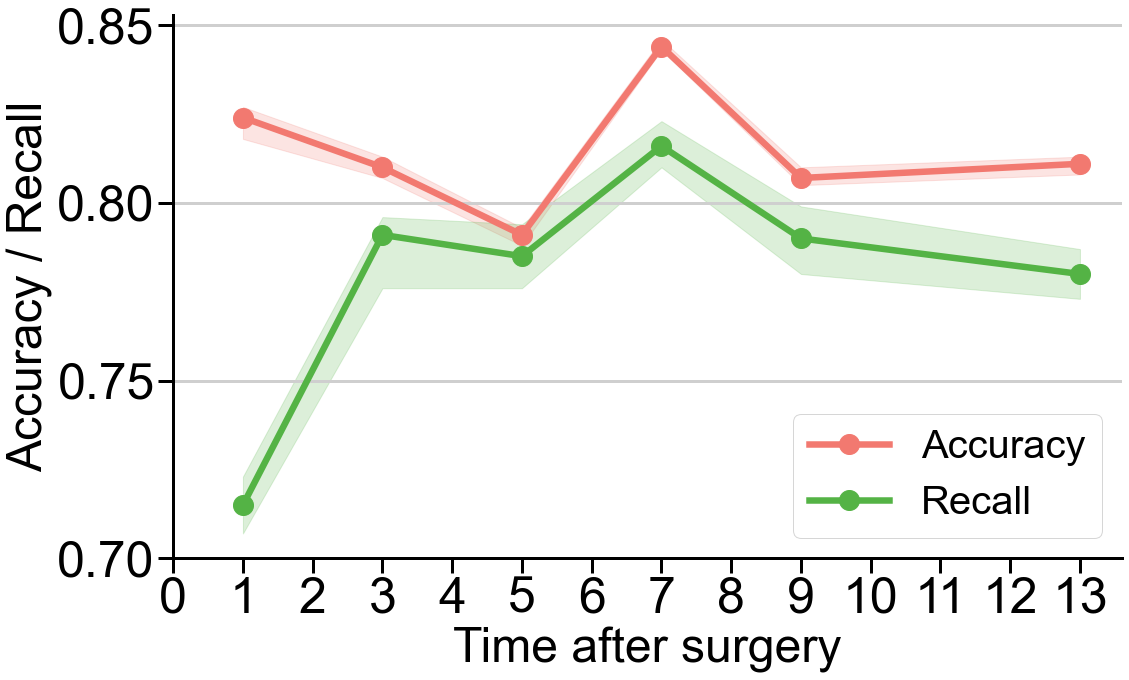

In [87]:
#accuracy curve
import matplotlib.pyplot as plt
perspective1_data=pd.read_excel('G:/AKIprediction/Maintext/Maintext/Figure3_data.xlsx',sheet_name=1)
fig,ax = plt.subplots(figsize = (17, 10))
plt.grid(color='#CFCFCF',lw=3,axis="y")
ax.plot(perspective1_data['xaxis'], perspective1_data['accuracy'], label='Accuracy', color='#F27970',linewidth=6.5,marker='o',
        markersize=20)
ax.fill_between(perspective1_data['xaxis'],perspective1_data['accuracy_lower'],perspective1_data['accuracy_upper'],color="#F27970",alpha=0.2)
ax.plot(perspective1_data['xaxis'], perspective1_data['recall'], label='Recall', color='#54B345',linewidth=6.5,marker='o',
        markersize=20)
ax.fill_between(perspective1_data['xaxis'],perspective1_data['recall_lower'],perspective1_data['recall_upper'],color="#54B345",alpha=0.2)
font2 = {'family' : 'Arial',
'weight' : 'normal',
'size'   : 48,
}
plt.yticks(np.arange(0.70,0.86, 0.05))
plt.xticks(np.arange(0, 14, 1))
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(True)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(True)
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()
ax.spines['bottom'].set_linewidth(3)
ax.spines['left'].set_linewidth(3)
ax.tick_params(labelsize=50)
ax.tick_params(which='major',width=3,length=15)
labels = ax.get_xticklabels() + ax.get_yticklabels()
[label.set_fontname('Arial') for label in labels]
plt.xlabel('Time after surgery',font2)
plt.ylabel('Accuracy / Recall',font2)
plt.legend(loc="lower right",prop={'size':40,'family' : 'Arial','weight' : 'normal'})
plt.savefig('G:/AKIprediction/non_SMOTE_result/recall_accuracy_ourmodel_P2.tiff',bbox_inches = 'tight',dpi=300)

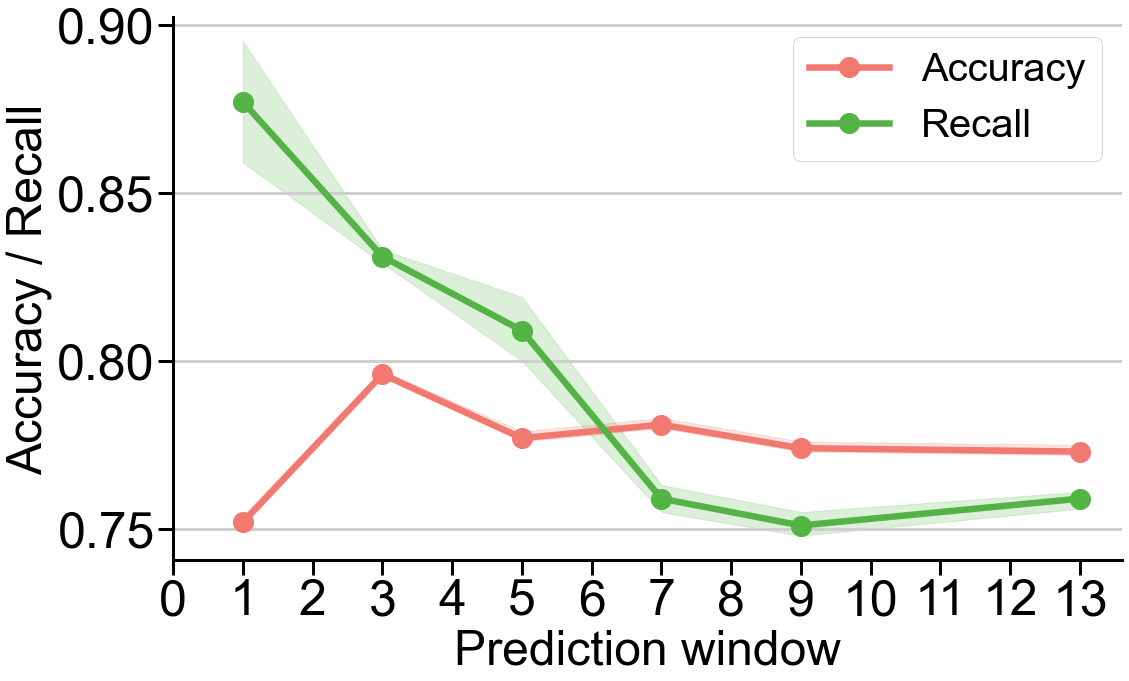

In [88]:
#accuracy curve
import matplotlib.pyplot as plt
perspective1_data=pd.read_excel('G:/AKIprediction/Maintext/Maintext/Figure2_data.xlsx',sheet_name=2)
fig,ax = plt.subplots(figsize = (17, 10))
plt.grid(color='#CFCFCF',lw=3,axis="y")
ax.plot(perspective1_data['xaxis'], perspective1_data['accuracy'], label='Accuracy', color='#F27970',linewidth=6.5,marker='o',
        markersize=20)
ax.fill_between(perspective1_data['xaxis'],perspective1_data['accuracy_lower'],perspective1_data['accuracy_upper'],color="#F27970",alpha=0.2)
ax.plot(perspective1_data['xaxis'], perspective1_data['recall'], label='Recall', color='#54B345',linewidth=6.5,marker='o',
        markersize=20)
ax.fill_between(perspective1_data['xaxis'],perspective1_data['recall_lower'],perspective1_data['recall_upper'],color="#54B345",alpha=0.2)
font2 = {'family' : 'Arial',
'weight' : 'normal',
'size'   : 48,
}
plt.yticks(np.arange(0.75,0.91, 0.05))
plt.xticks(np.arange(0, 14, 1))
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(True)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(True)
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()
ax.spines['bottom'].set_linewidth(3)
ax.spines['left'].set_linewidth(3)
ax.tick_params(labelsize=50)
ax.tick_params(which='major',width=3,length=15)
labels = ax.get_xticklabels() + ax.get_yticklabels()
[label.set_fontname('Arial') for label in labels]
plt.xlabel('Prediction window',font2)
plt.ylabel('Accuracy / Recall',font2)
plt.legend(loc="upper right",prop={'size':40,'family' : 'Arial','weight' : 'normal'})
plt.savefig('G:/AKIprediction/SMOTE_result/recall_accuracy_ourmodel_P3.tiff',bbox_inches = 'tight',dpi=300)

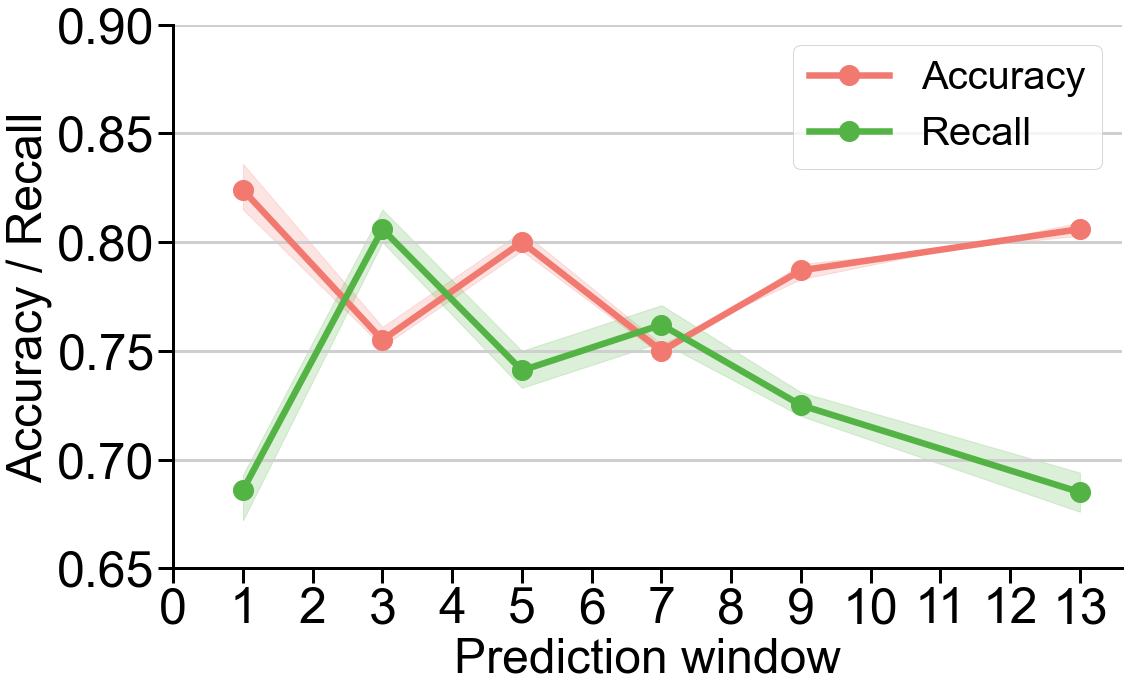

In [89]:
#accuracy curve
import matplotlib.pyplot as plt
perspective1_data=pd.read_excel('G:/AKIprediction/Maintext/Maintext/Figure3_data.xlsx',sheet_name=2)
fig,ax = plt.subplots(figsize = (17, 10))
plt.grid(color='#CFCFCF',lw=3,axis="y")
ax.plot(perspective1_data['xaxis'], perspective1_data['accuracy'], label='Accuracy', color='#F27970',linewidth=6.5,marker='o',
        markersize=20)
ax.fill_between(perspective1_data['xaxis'],perspective1_data['accuracy_lower'],perspective1_data['accuracy_upper'],color="#F27970",alpha=0.2)
ax.plot(perspective1_data['xaxis'], perspective1_data['recall'], label='Recall', color='#54B345',linewidth=6.5,marker='o',
        markersize=20)
ax.fill_between(perspective1_data['xaxis'],perspective1_data['recall_lower'],perspective1_data['recall_upper'],color="#54B345",alpha=0.2)
font2 = {'family' : 'Arial',
'weight' : 'normal',
'size'   : 48,
}
plt.yticks(np.arange(0.65,0.901, 0.05))
plt.xticks(np.arange(0, 14, 1))
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(True)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(True)
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()
ax.spines['bottom'].set_linewidth(3)
ax.spines['left'].set_linewidth(3)
ax.tick_params(labelsize=50)
ax.tick_params(which='major',width=3,length=15)
labels = ax.get_xticklabels() + ax.get_yticklabels()
[label.set_fontname('Arial') for label in labels]
plt.xlabel('Prediction window',font2)
plt.ylabel('Accuracy / Recall',font2)
plt.legend(loc="upper right",prop={'size':40,'family' : 'Arial','weight' : 'normal'})
plt.savefig('G:/AKIprediction/non_SMOTE_result/recall_accuracy_ourmodel_P3.tiff',bbox_inches = 'tight',dpi=300)